In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['figure.dpi'] = 300
plt.show()

In [2]:
data = pd.read_csv('adult_with_headers.csv')

In [3]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Performing EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 2 types of data in dataframe columns - int and object
No null entries (missing) present.

In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
# confirming missing values other than NaN

for i in range(0, 15):
    print(data.iloc[:, i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

In [9]:
# As we have missing values present only in categorical columns
# replacing those with the mode values of their columns using SimpleImputer.

# replacing ? with NaN.
data.replace(' ?', np.nan, inplace = True)
print(data.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [10]:
# Missing values Imputation.
si = SimpleImputer(strategy='most_frequent')
data.iloc[:, [1, 6, 13]] = si.fit_transform(data.iloc[:, [1, 6, 12]])

In [11]:
# Checking whether SimpleImputer has replaced missing values or not
print(data.iloc[:, 1].unique())
print(data.iloc[:, 6].unique())
print(data.iloc[:, 13].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]


In [12]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Visualization

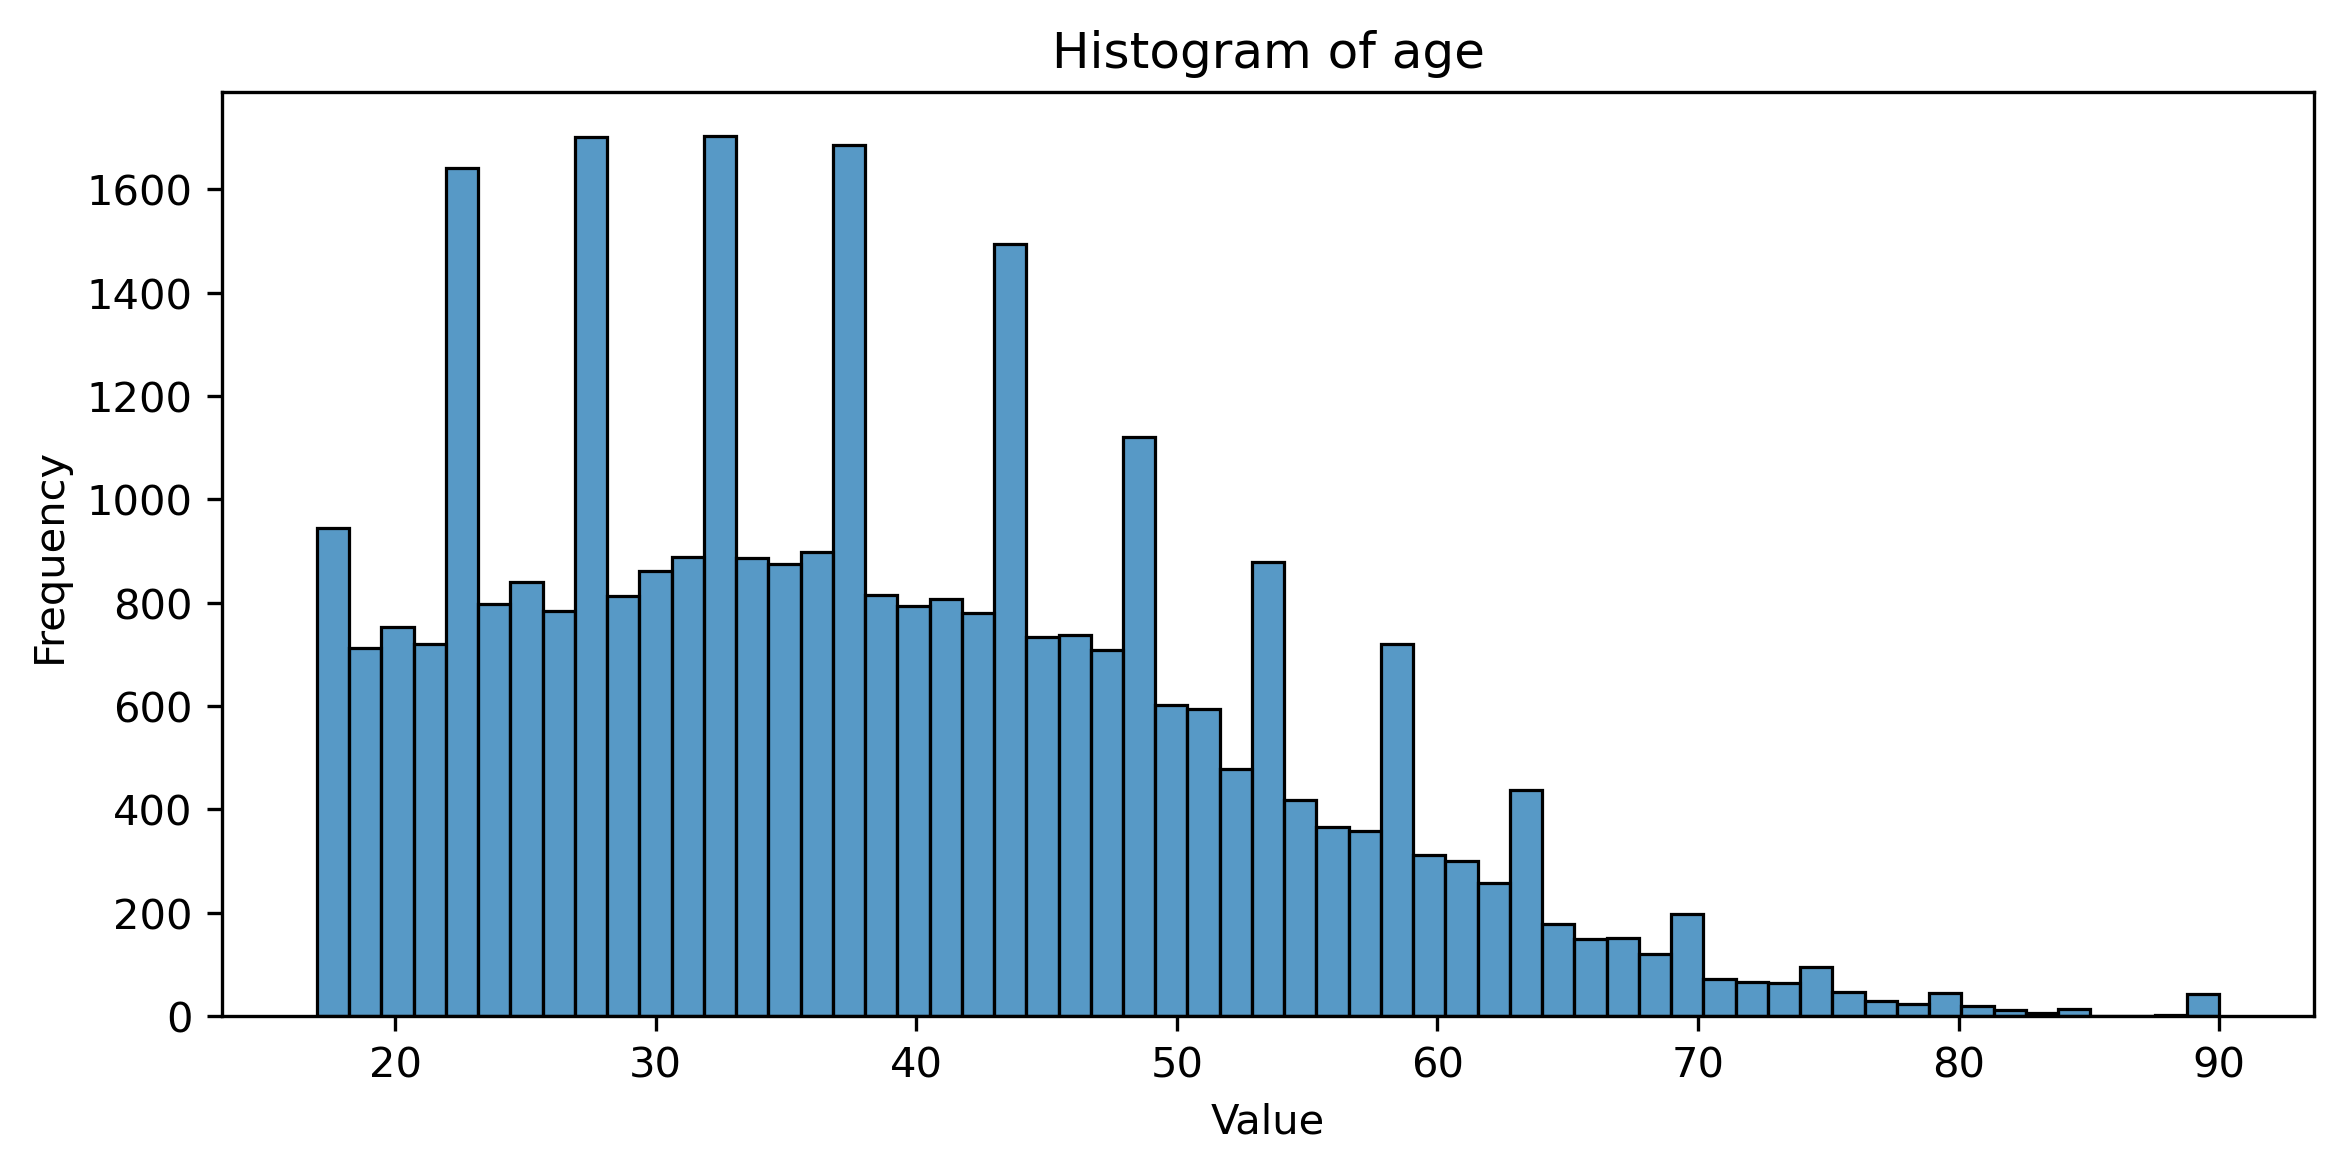

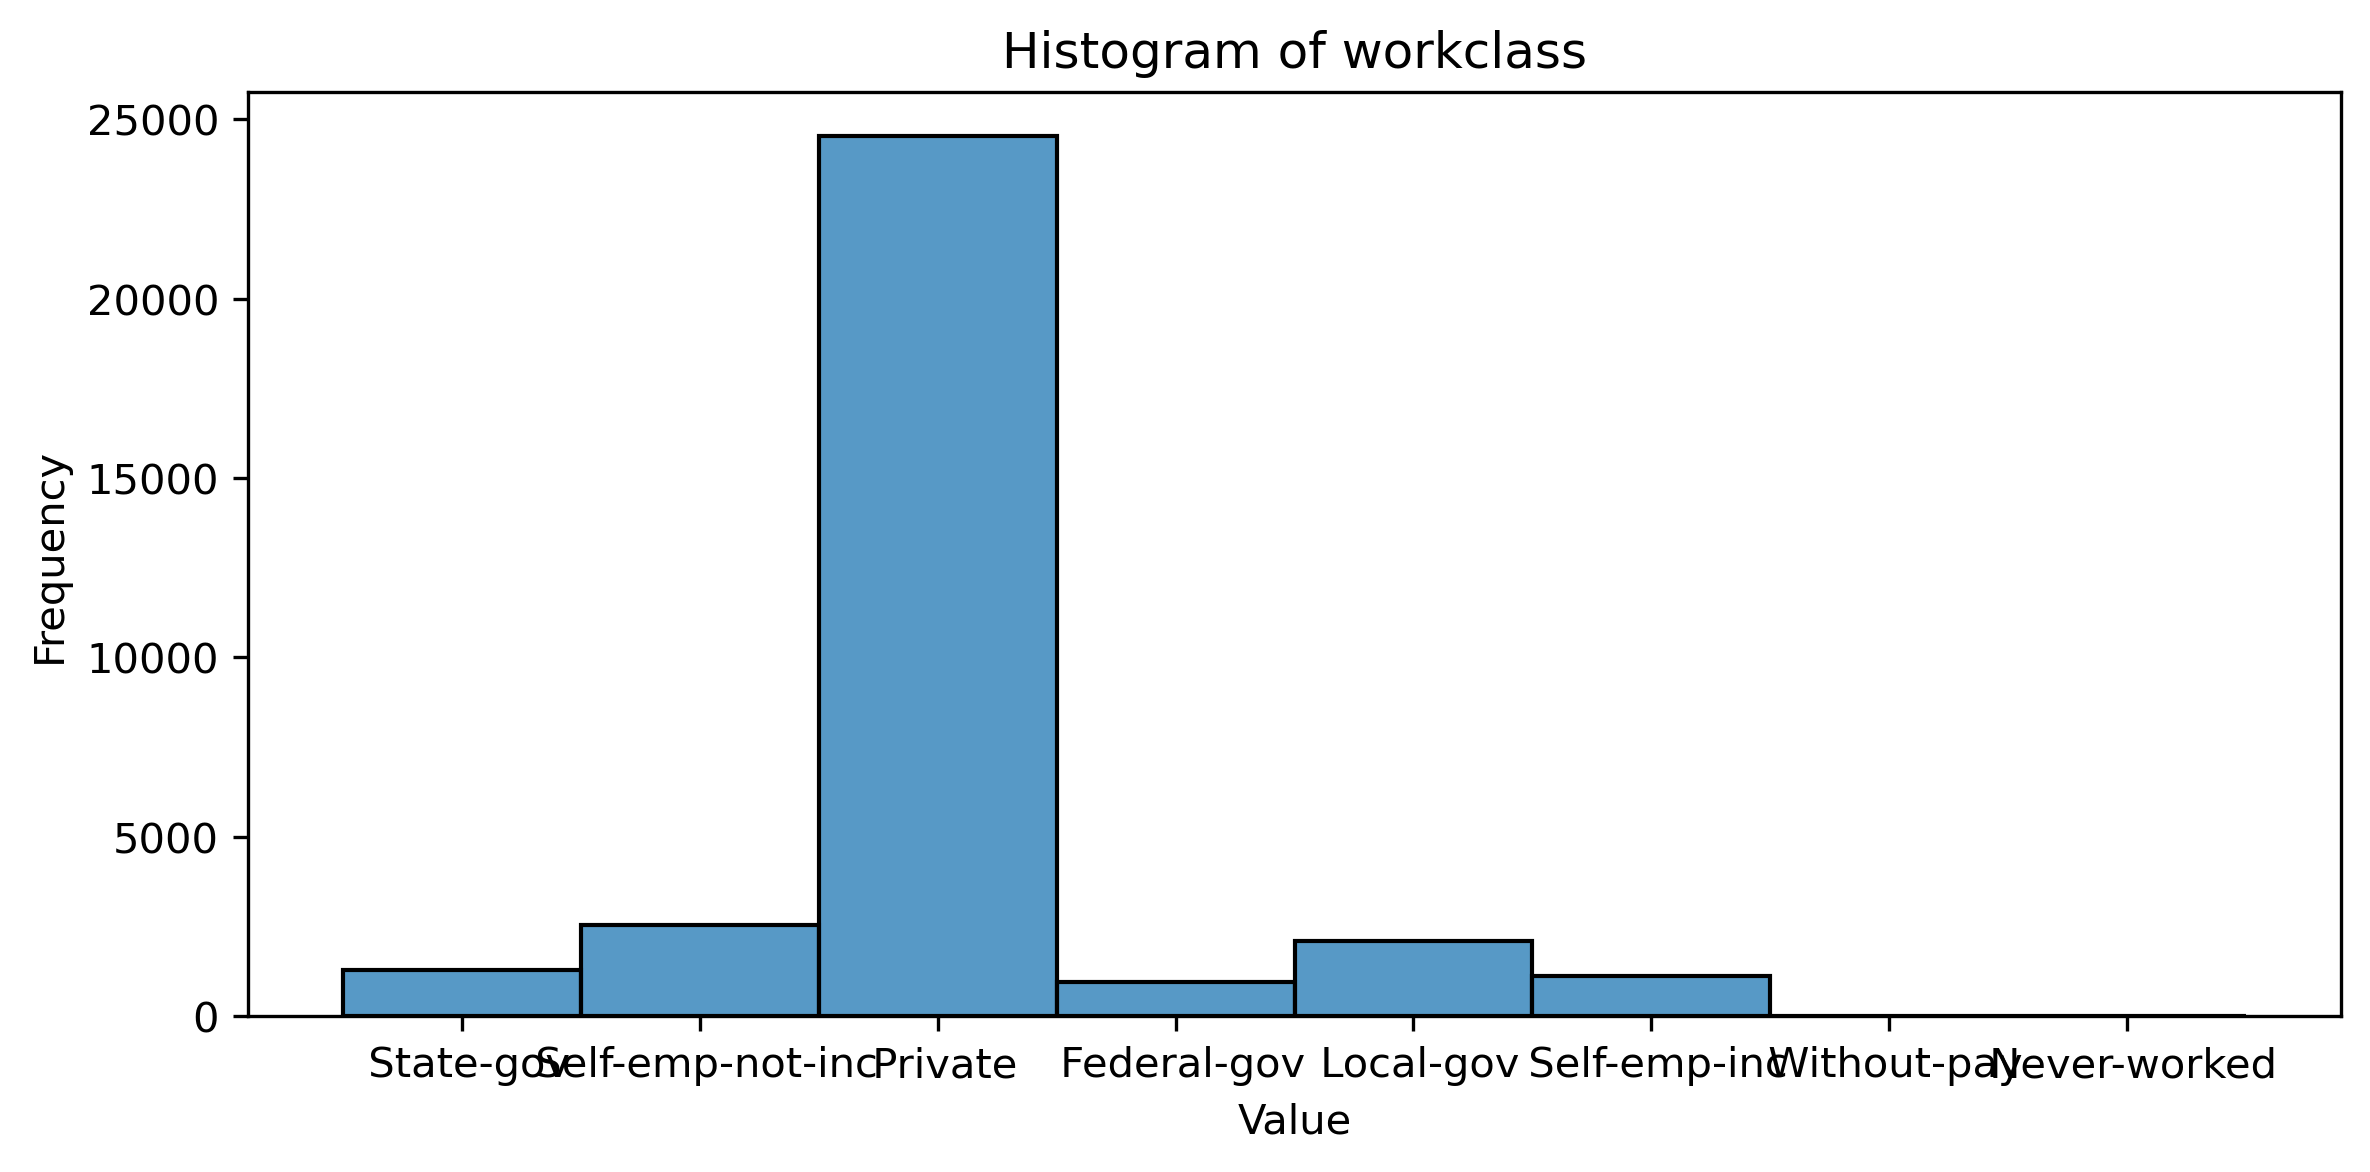

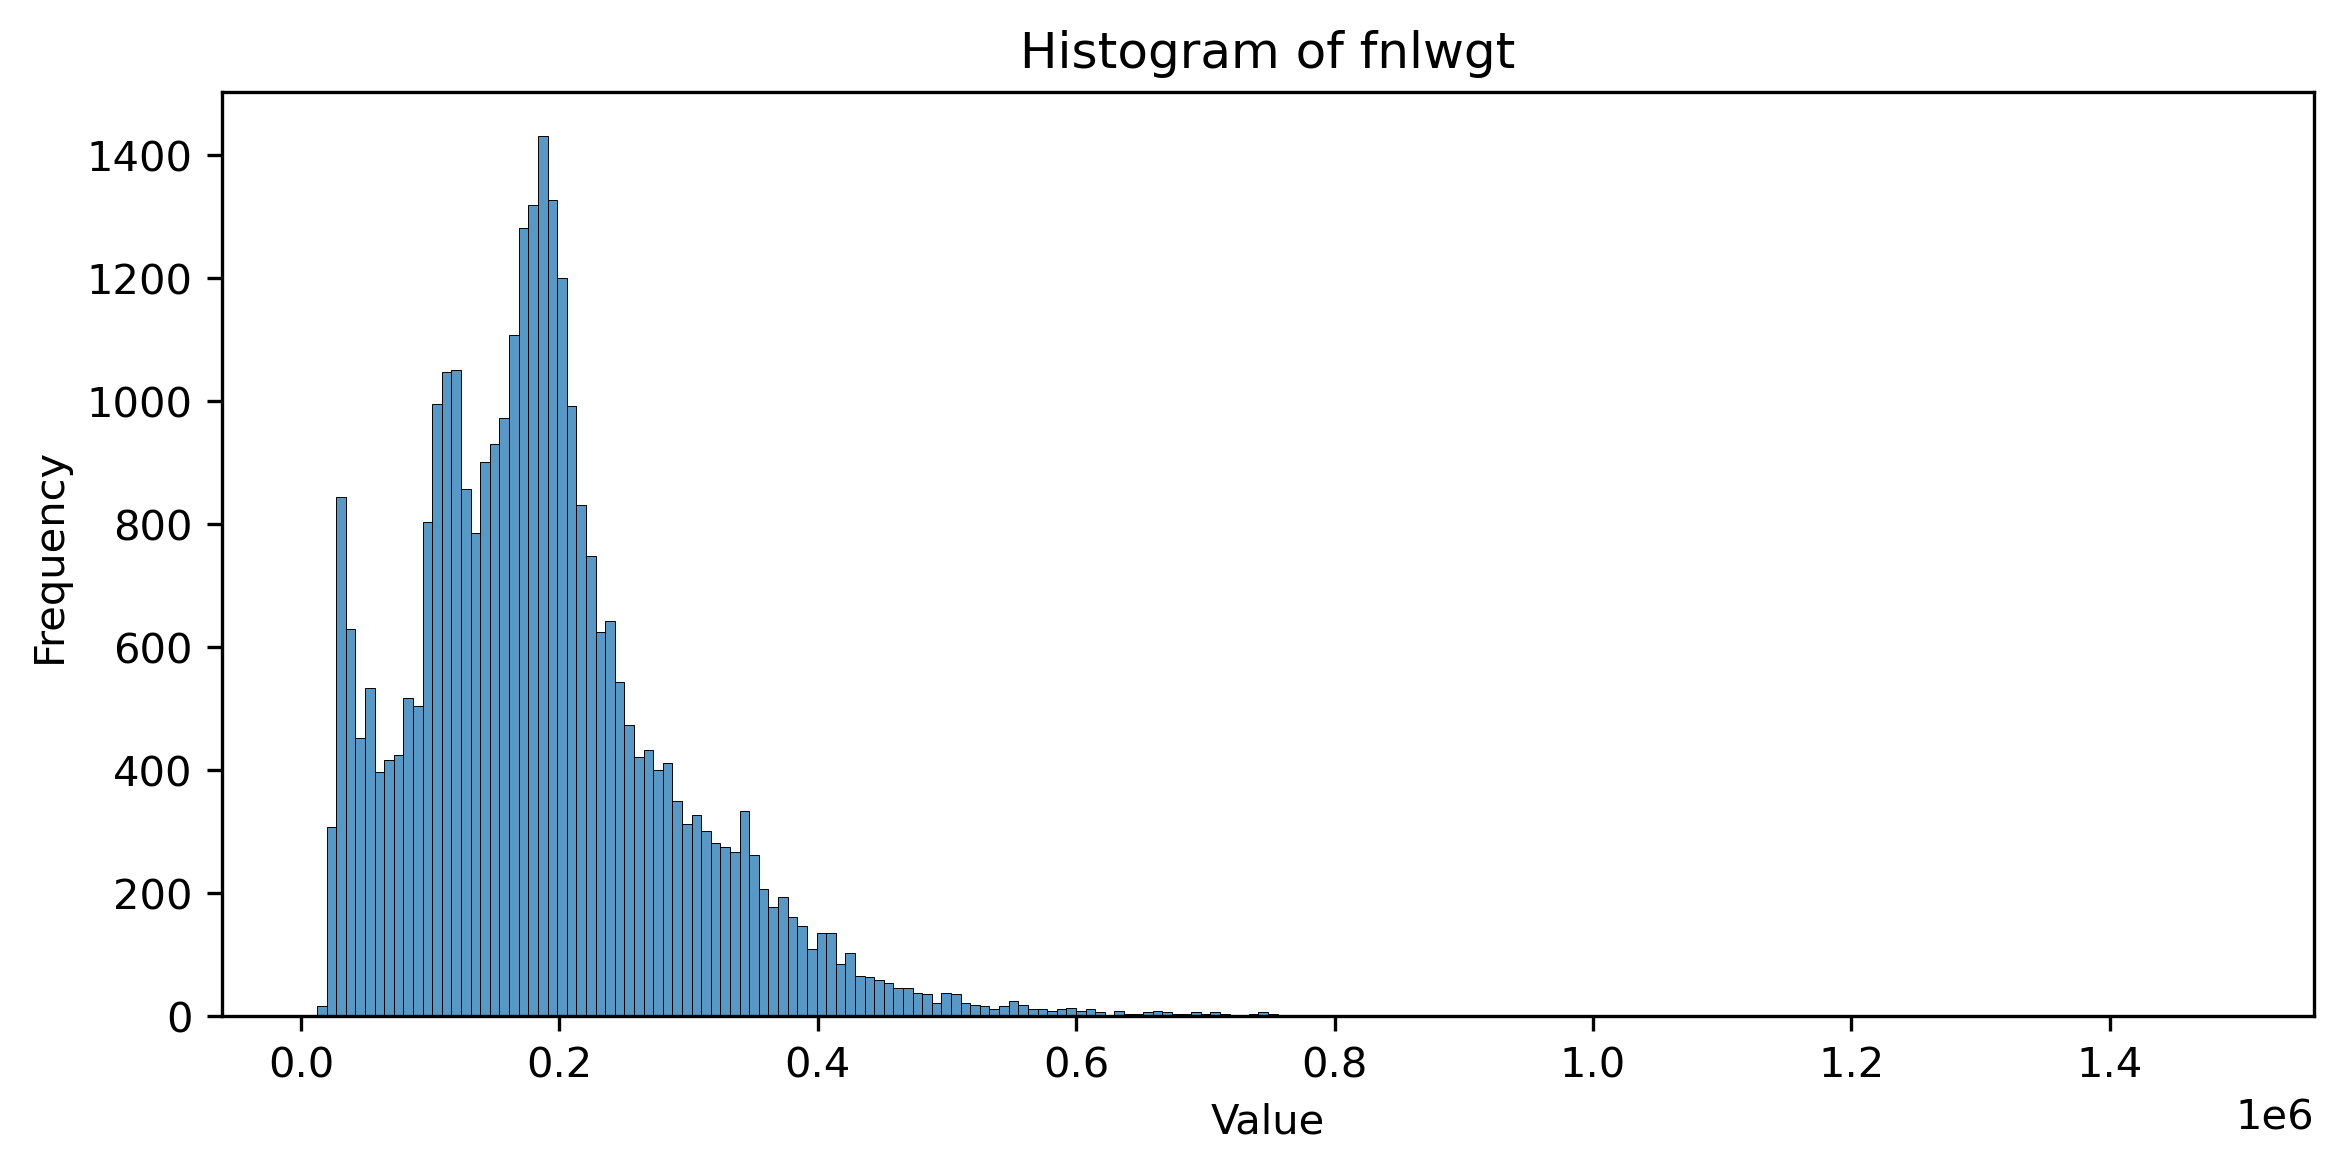

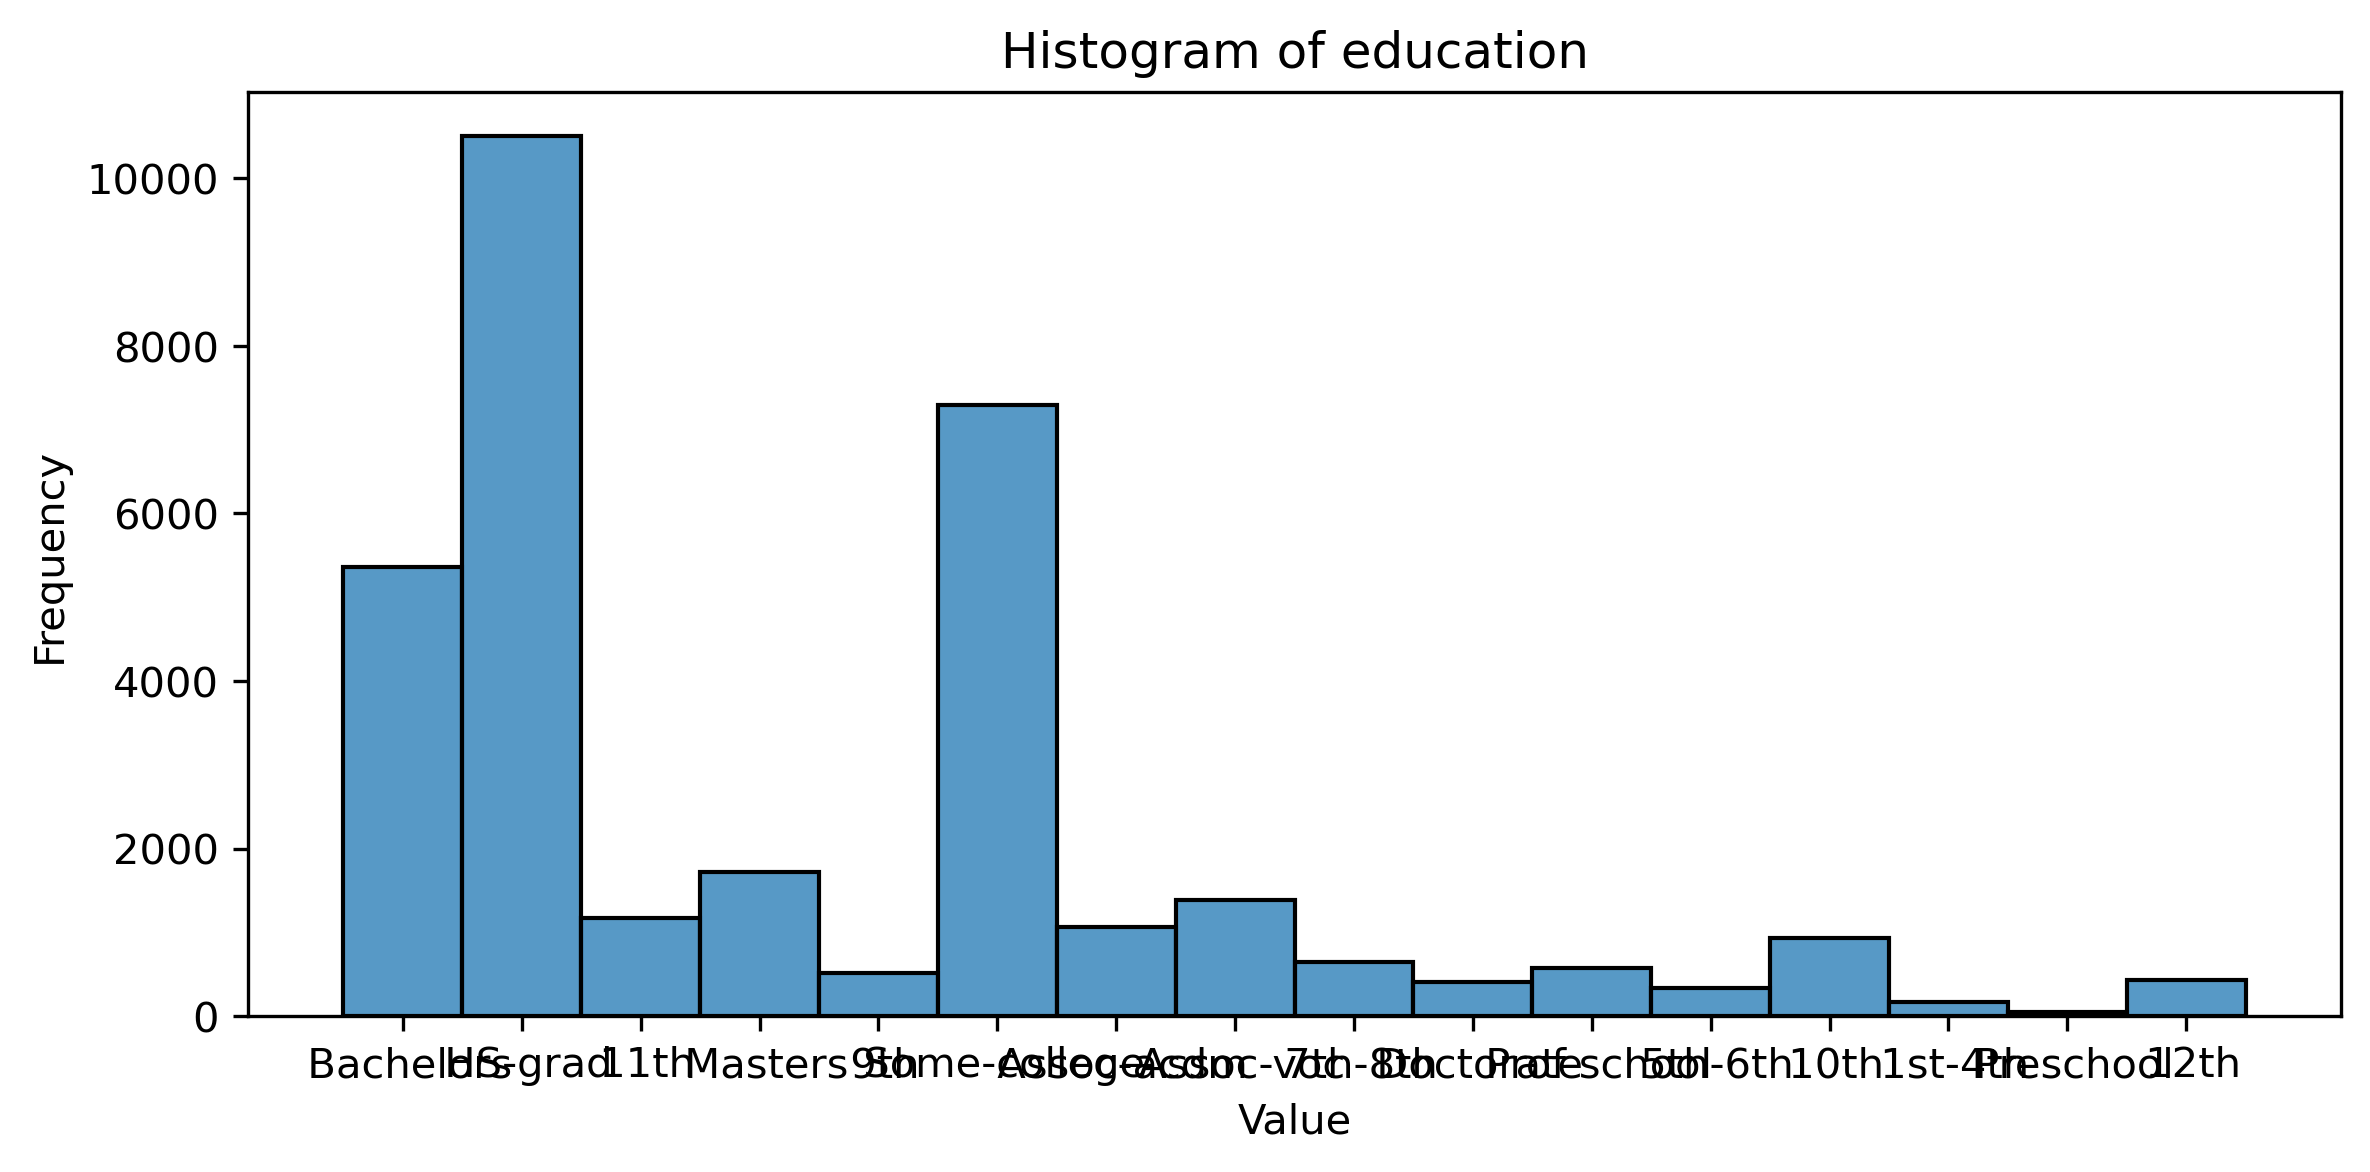

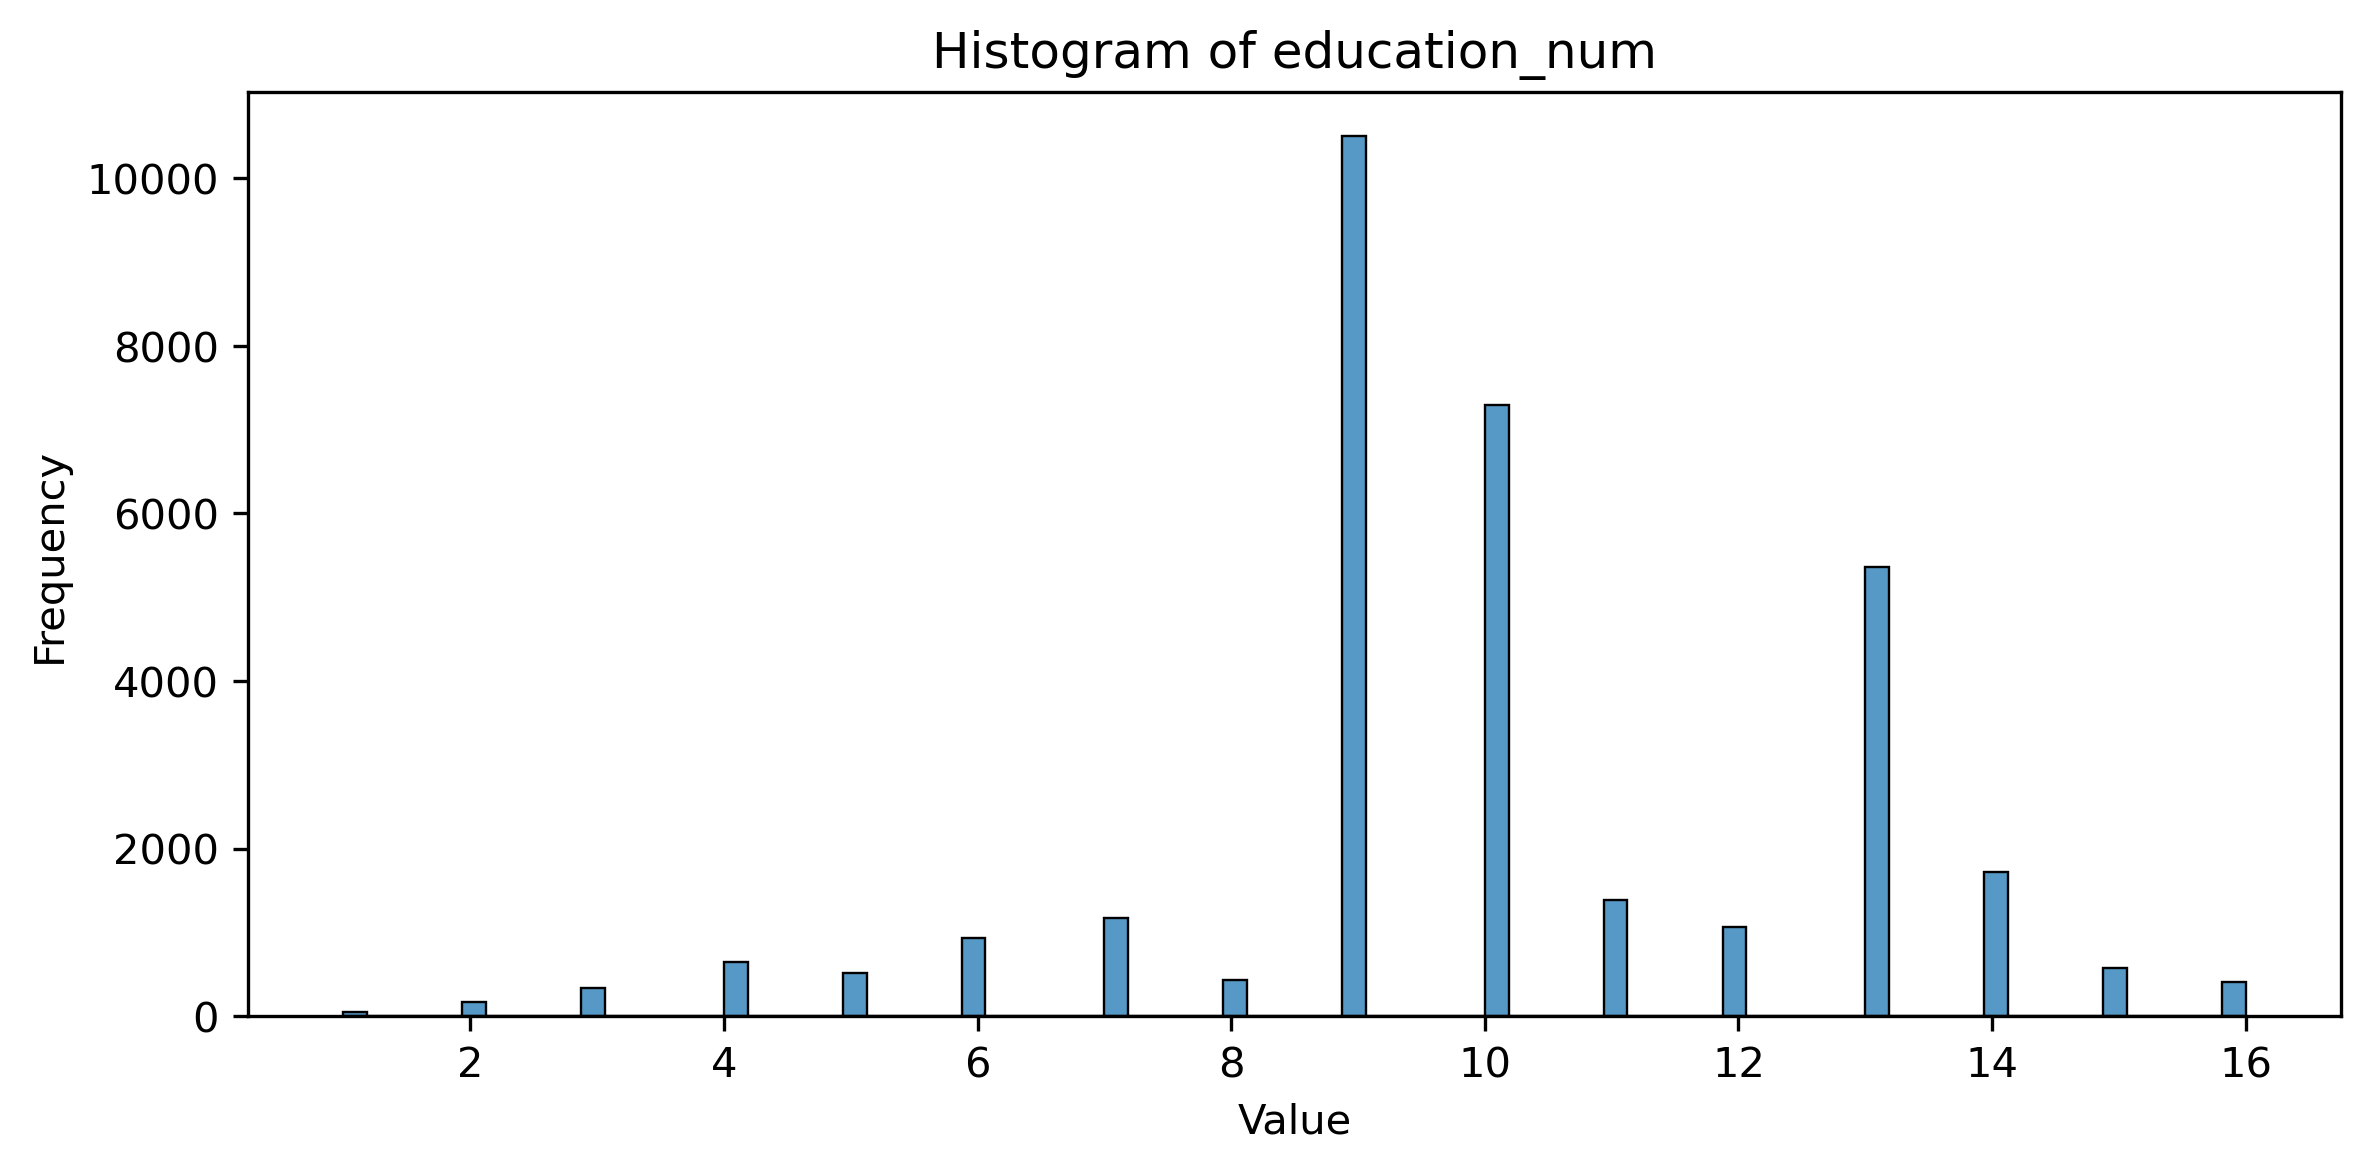

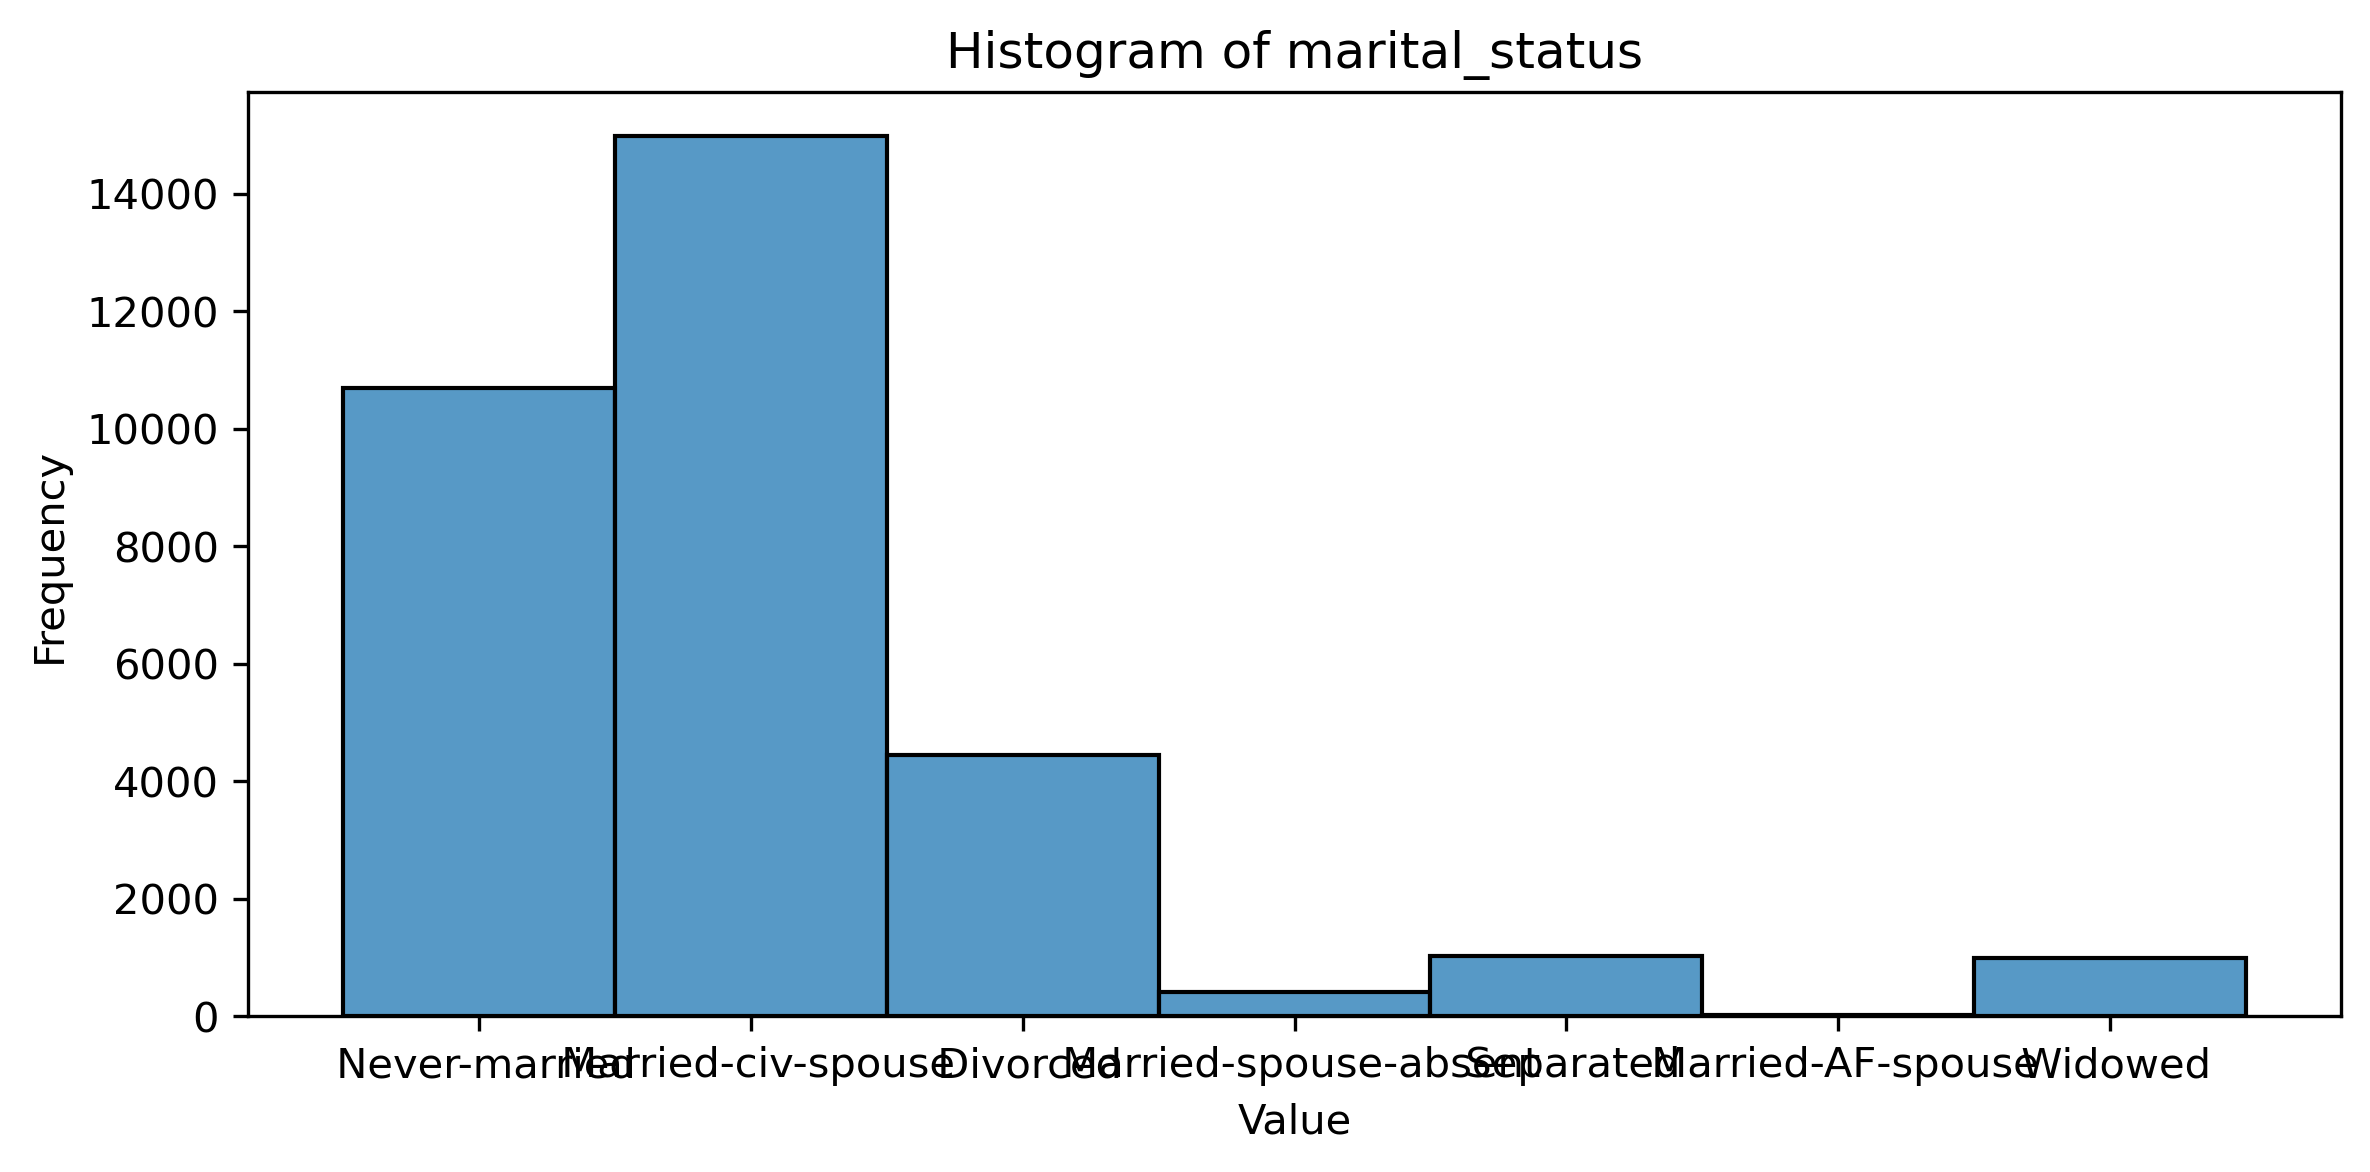

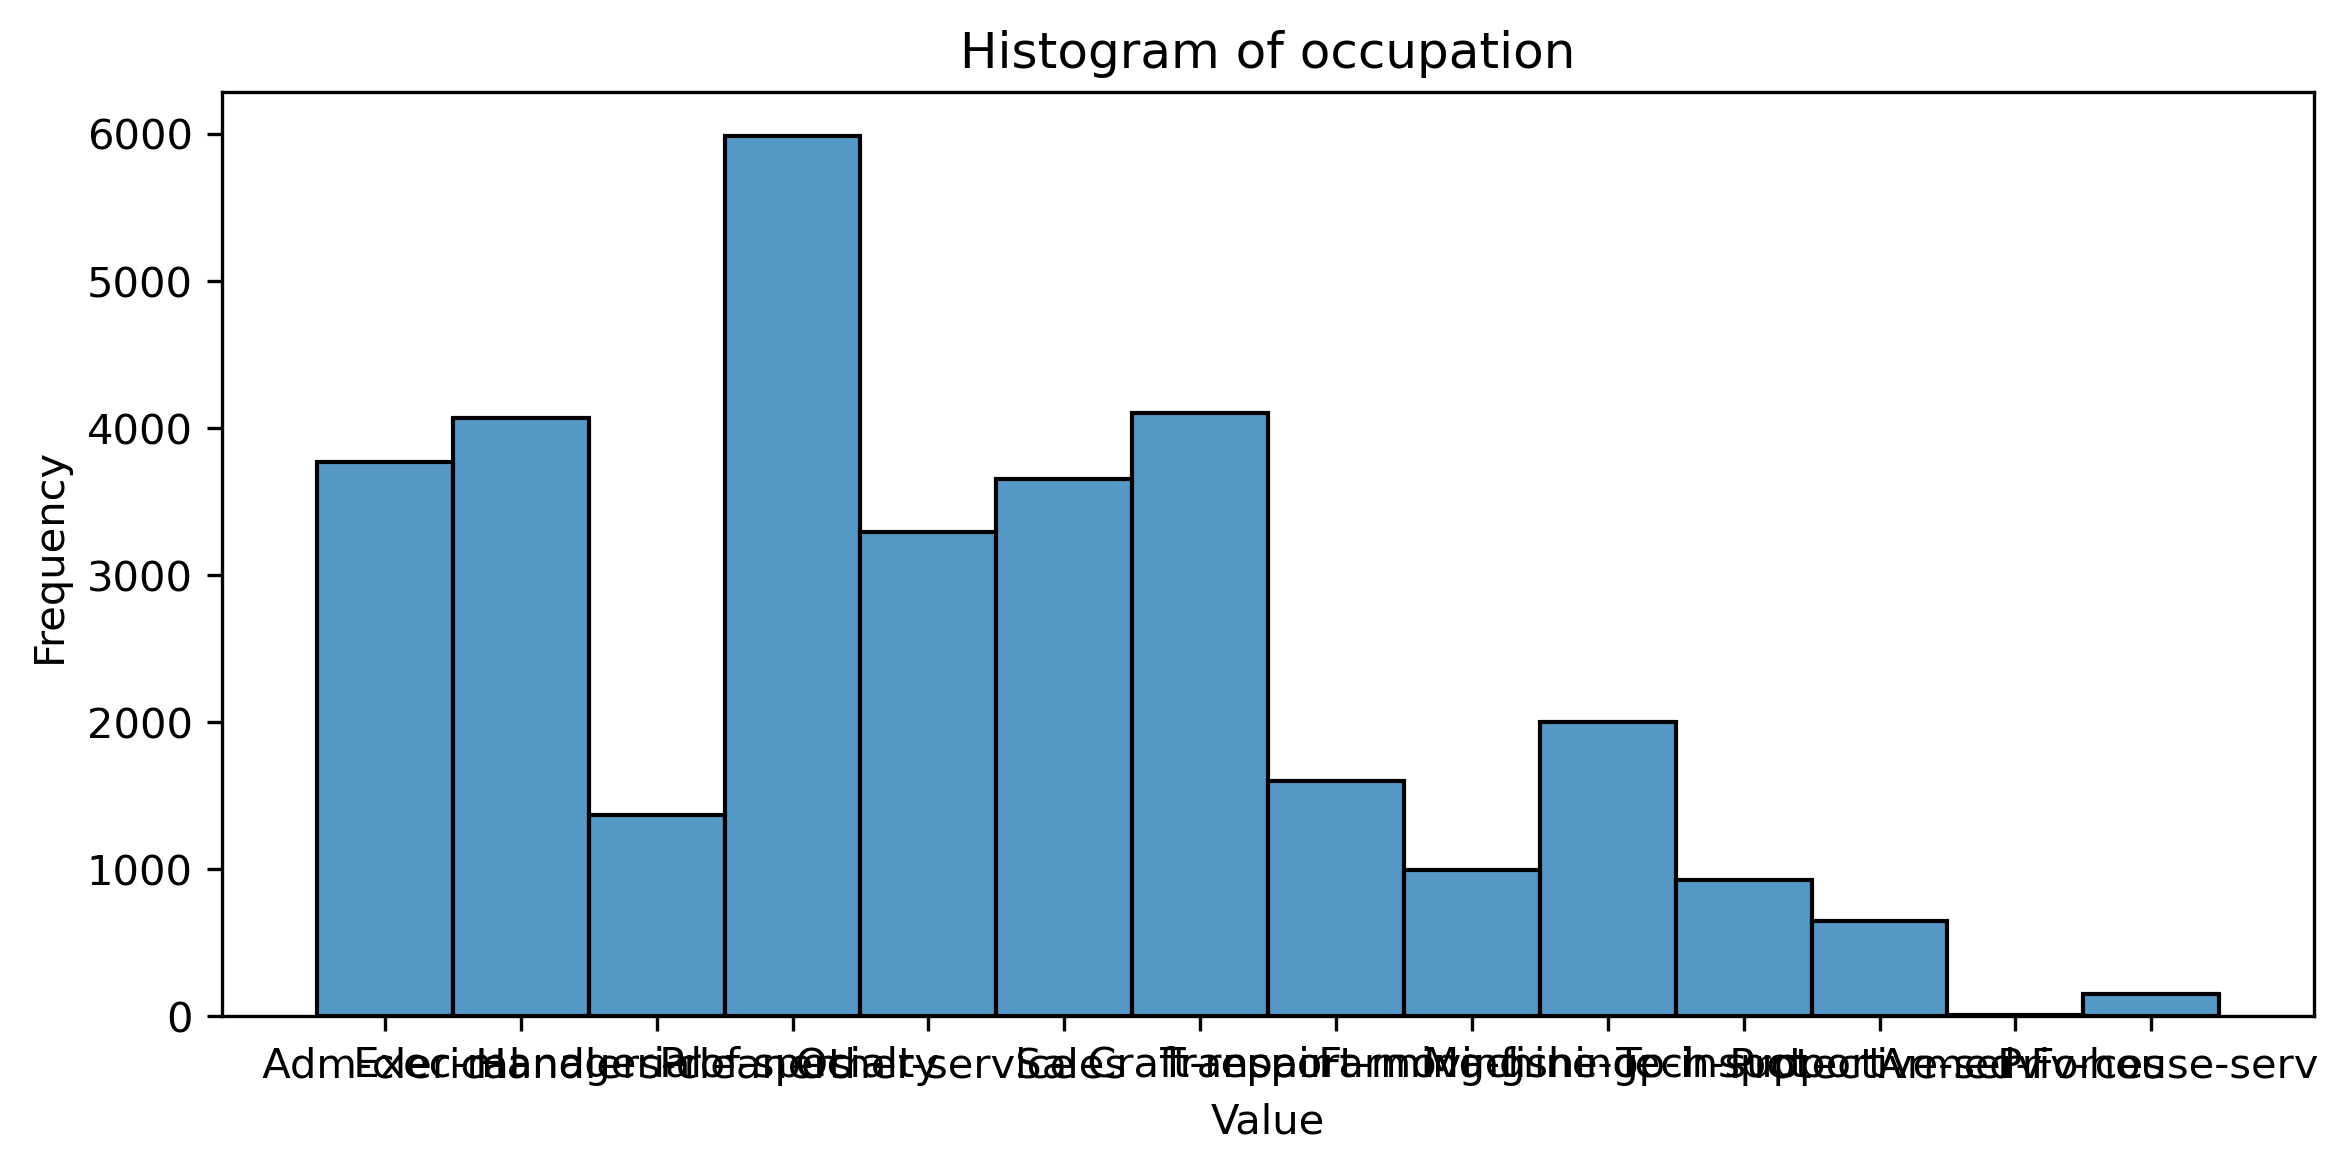

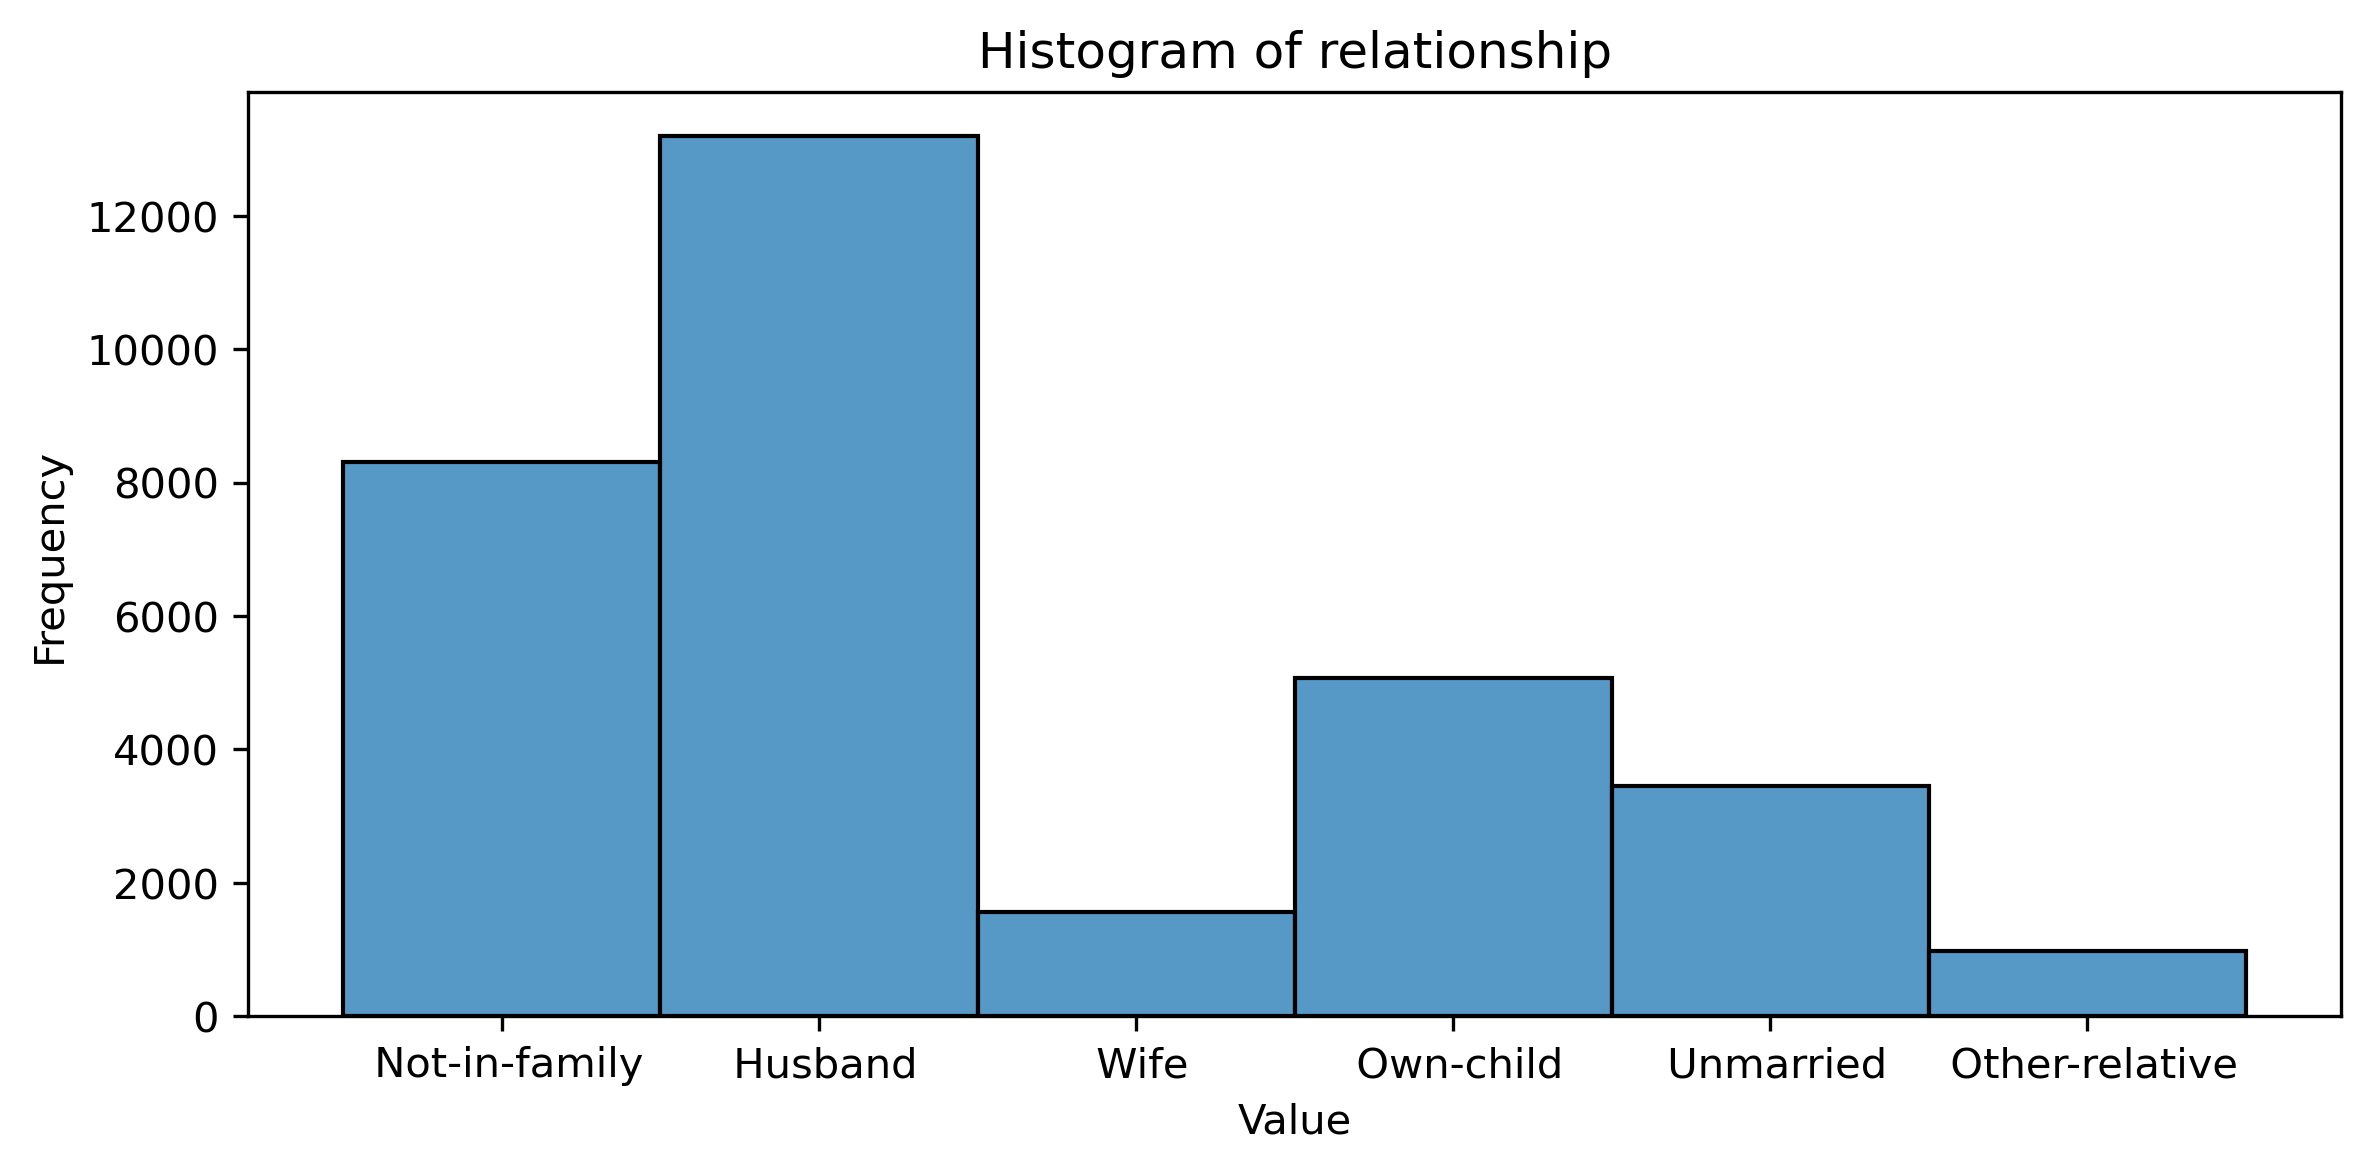

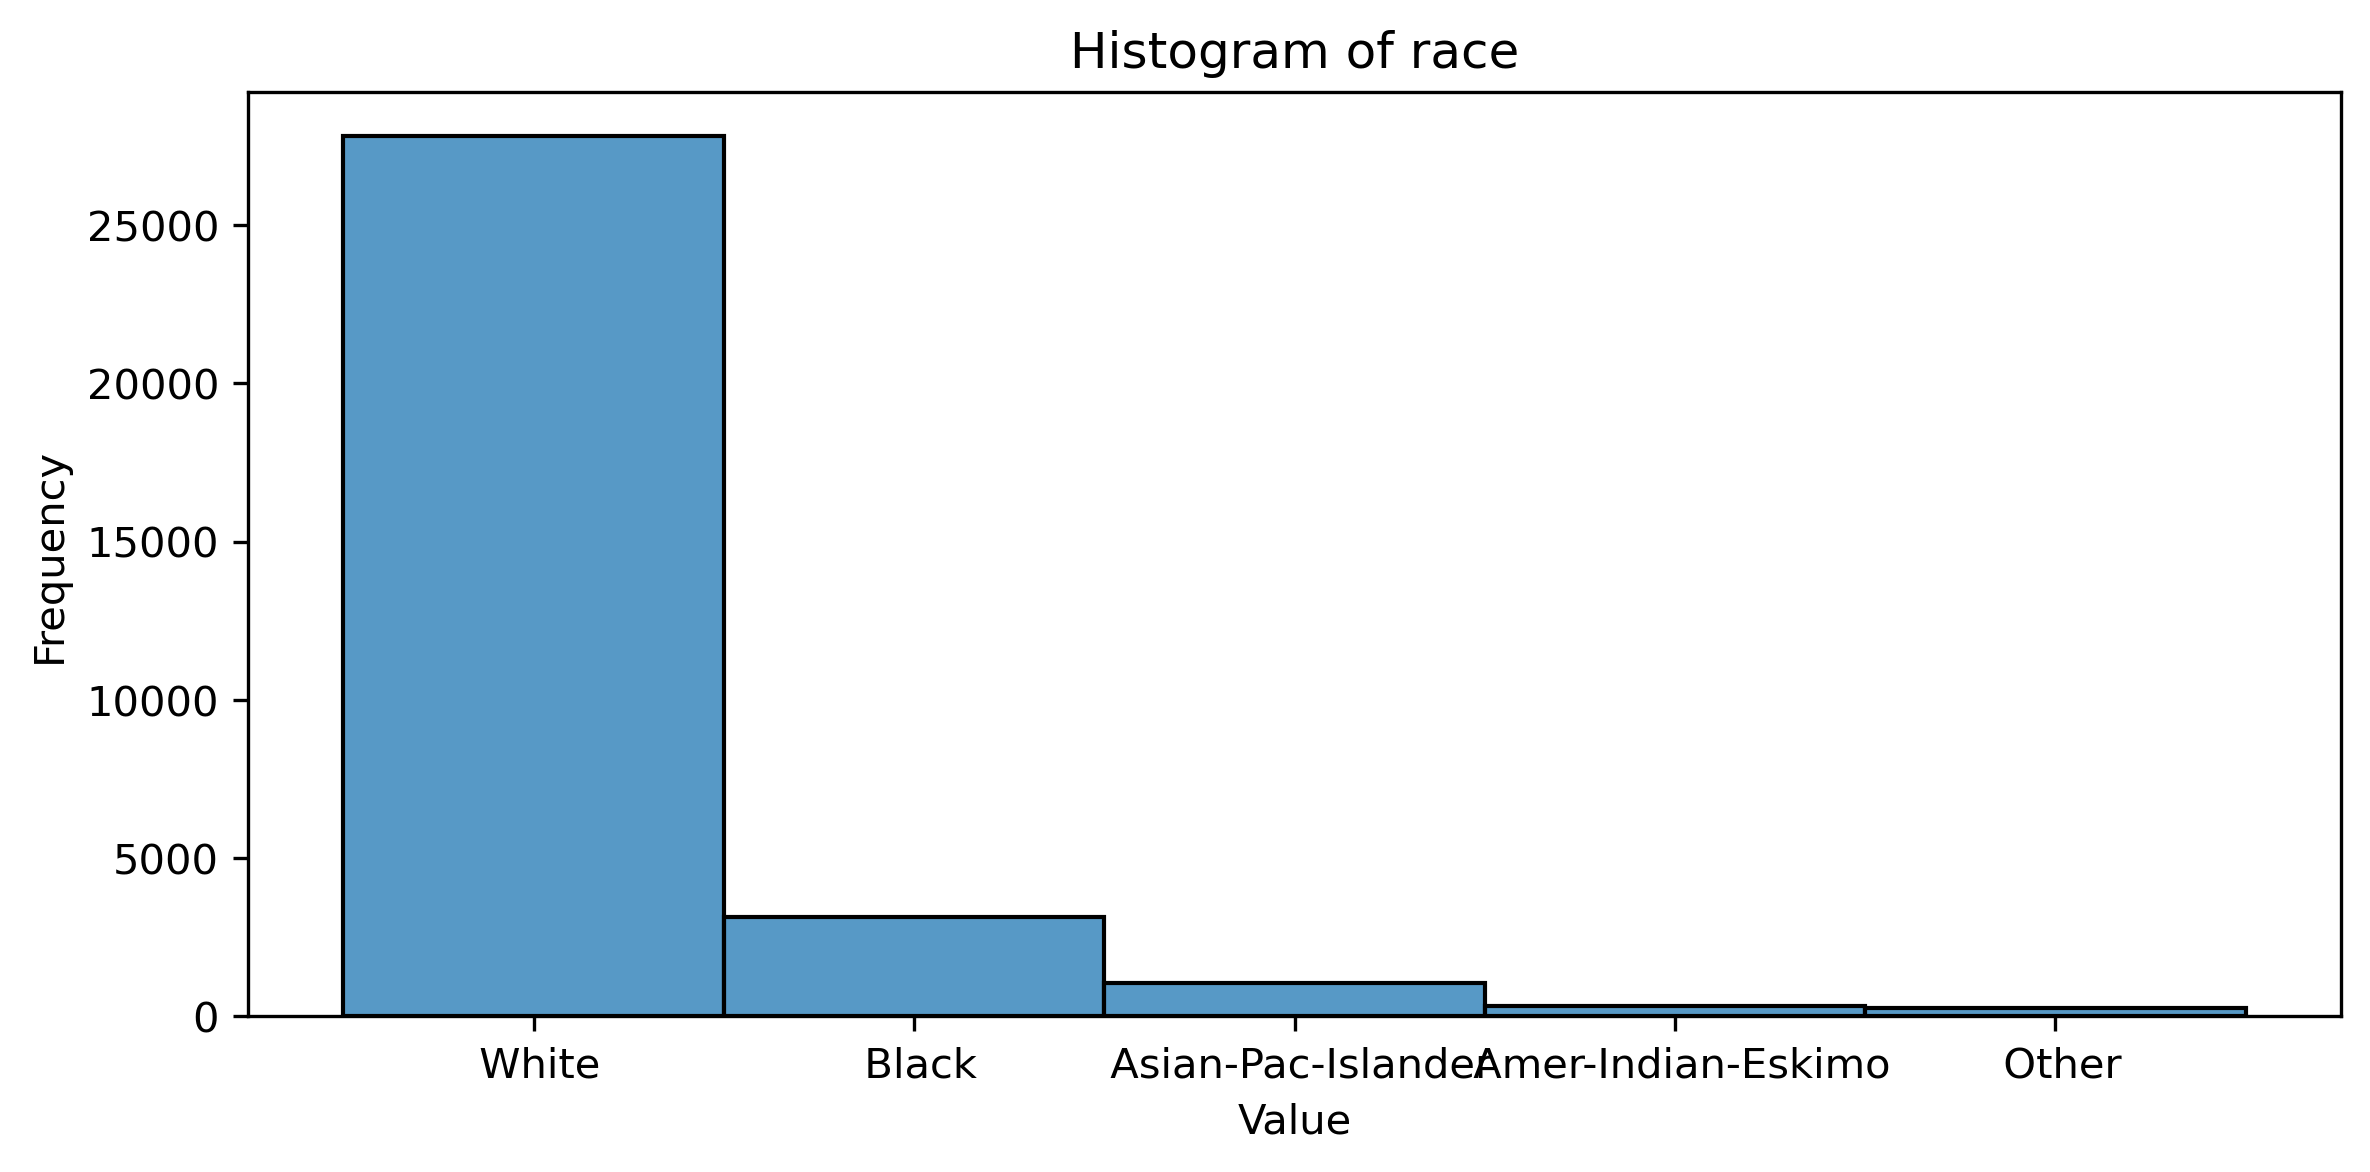

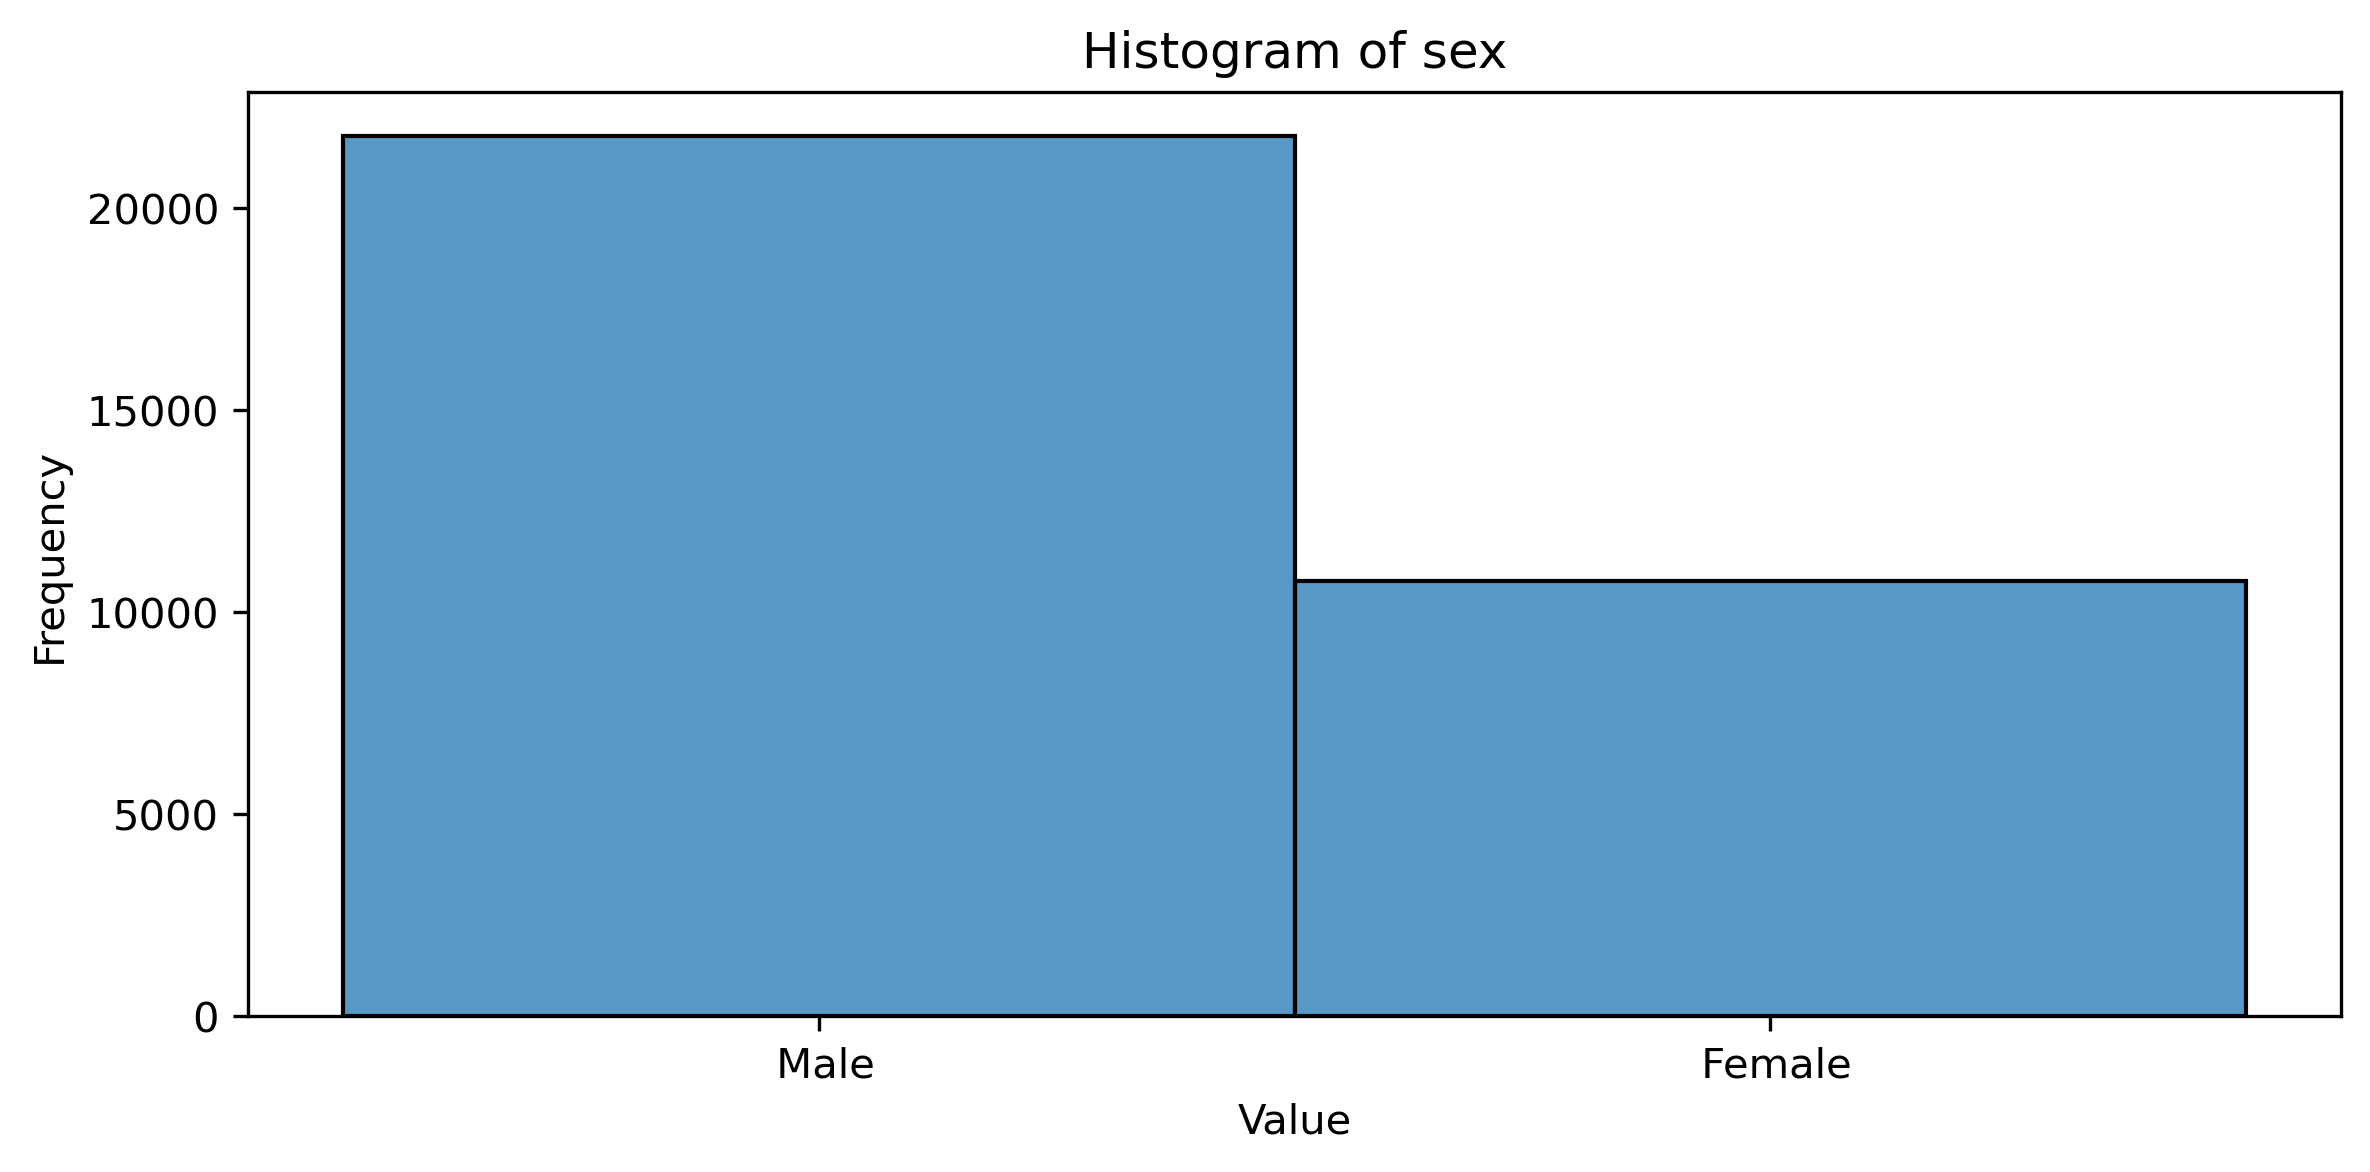

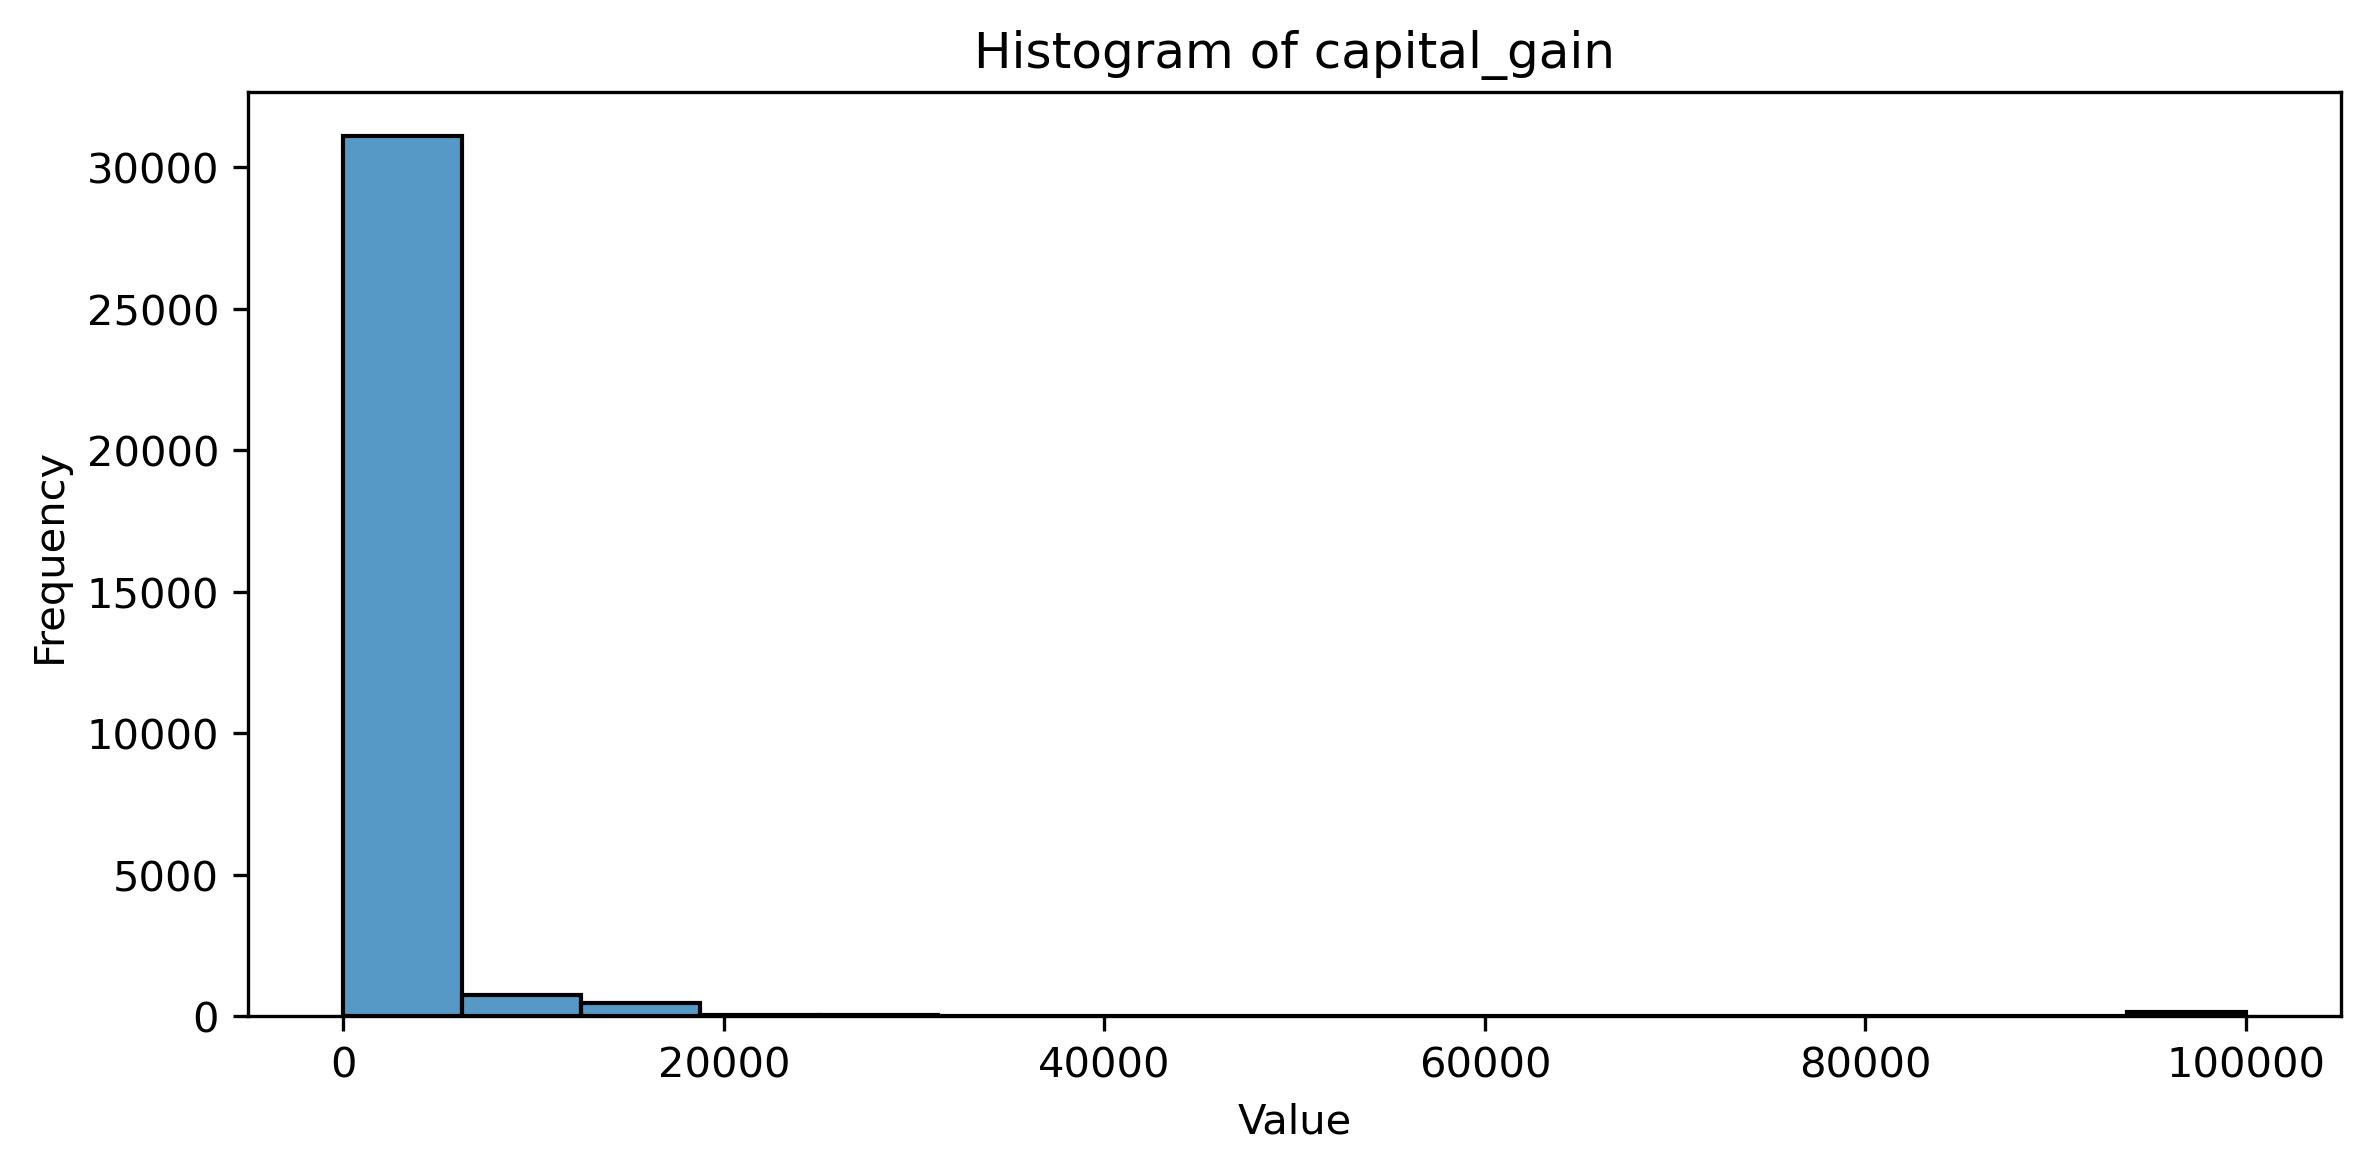

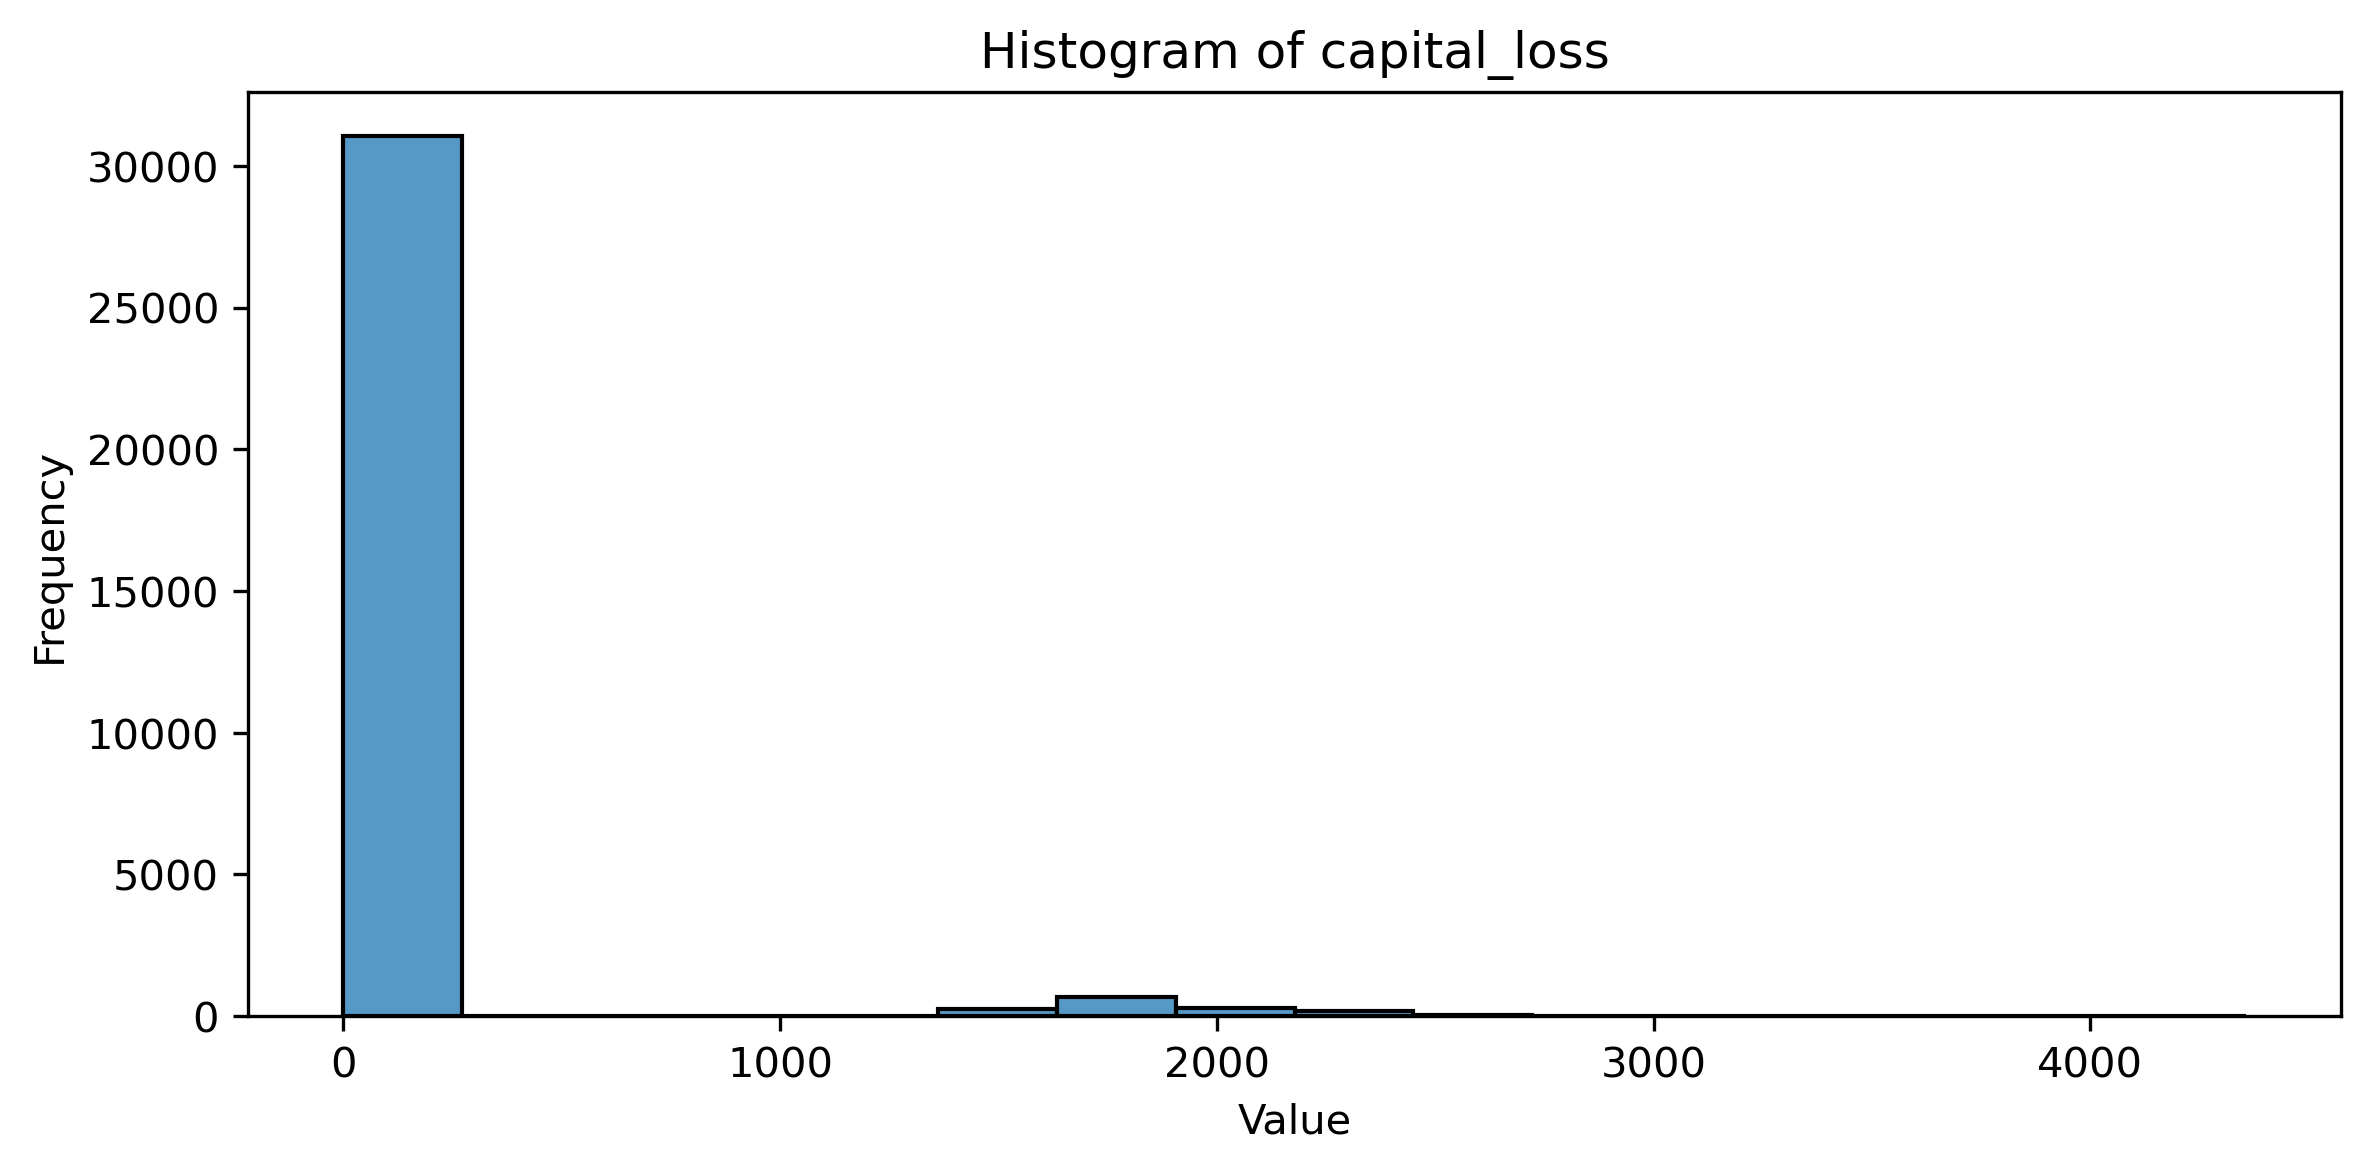

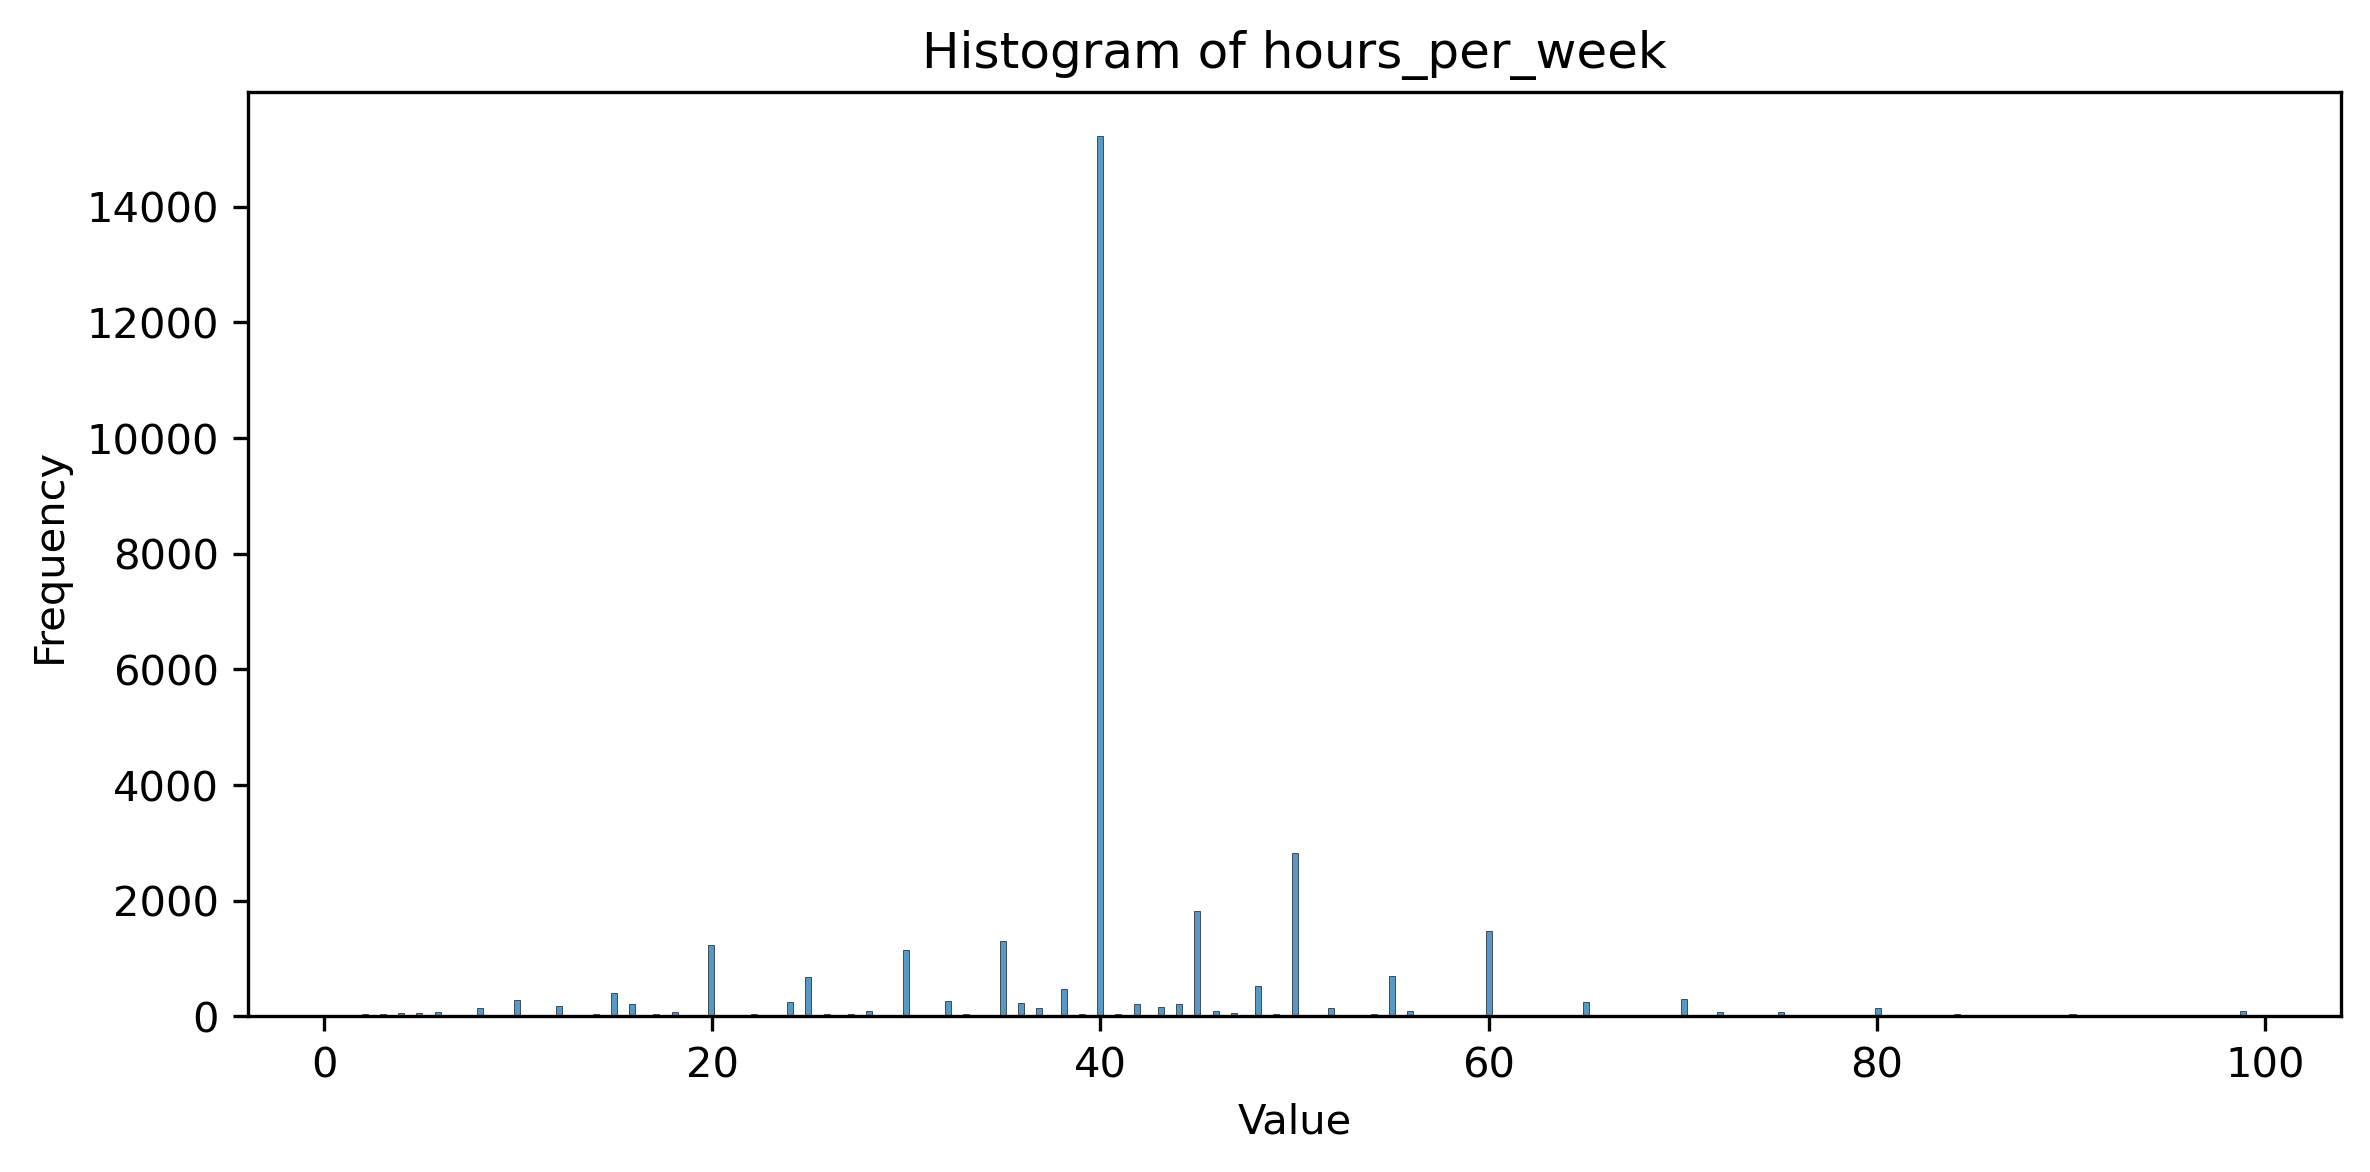

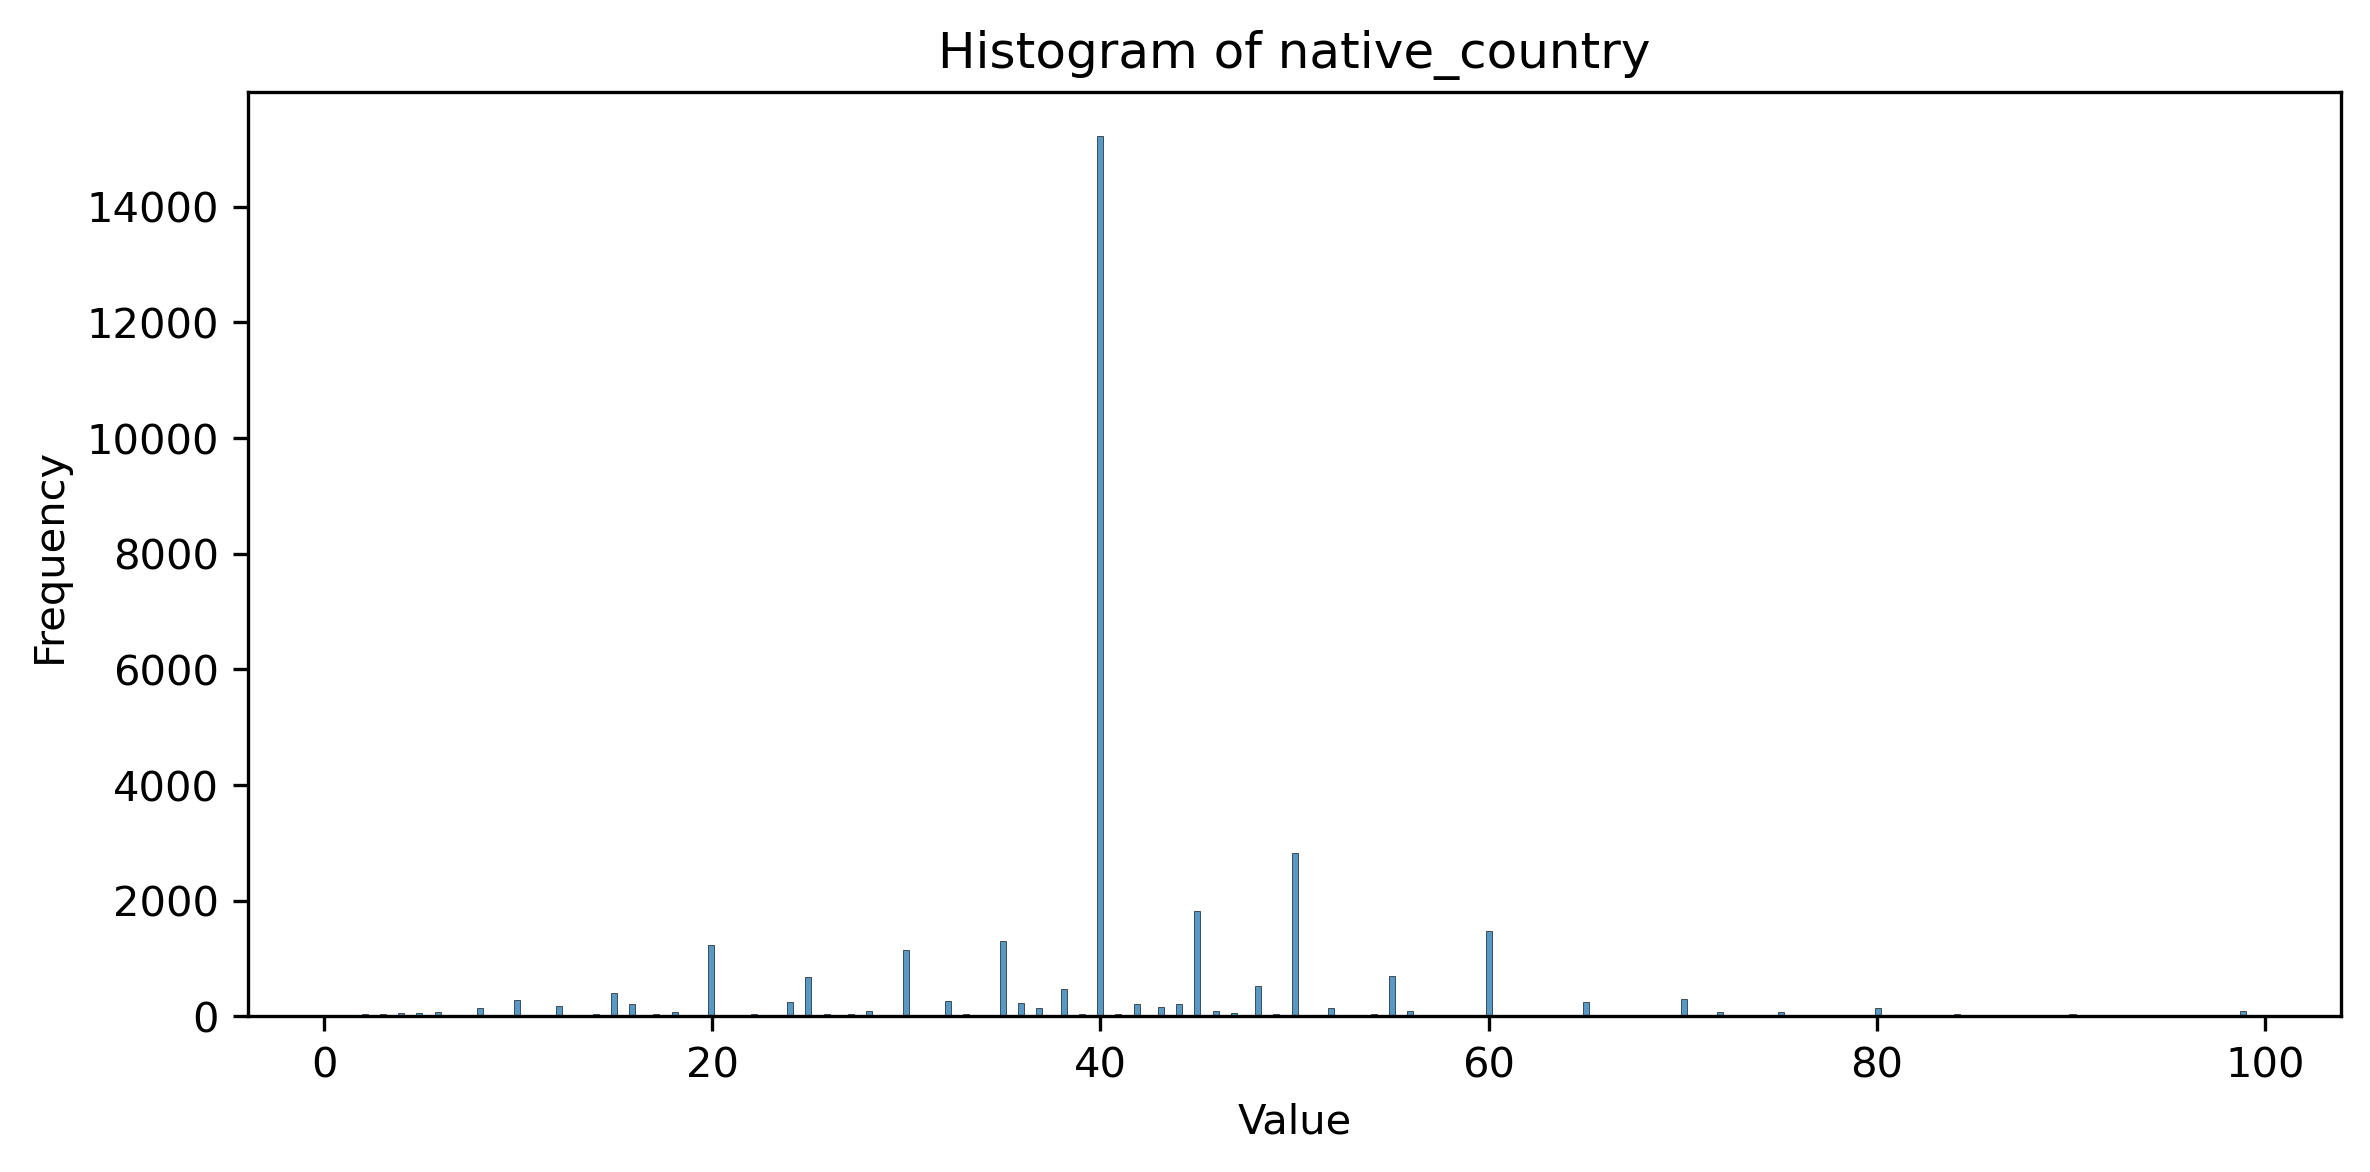

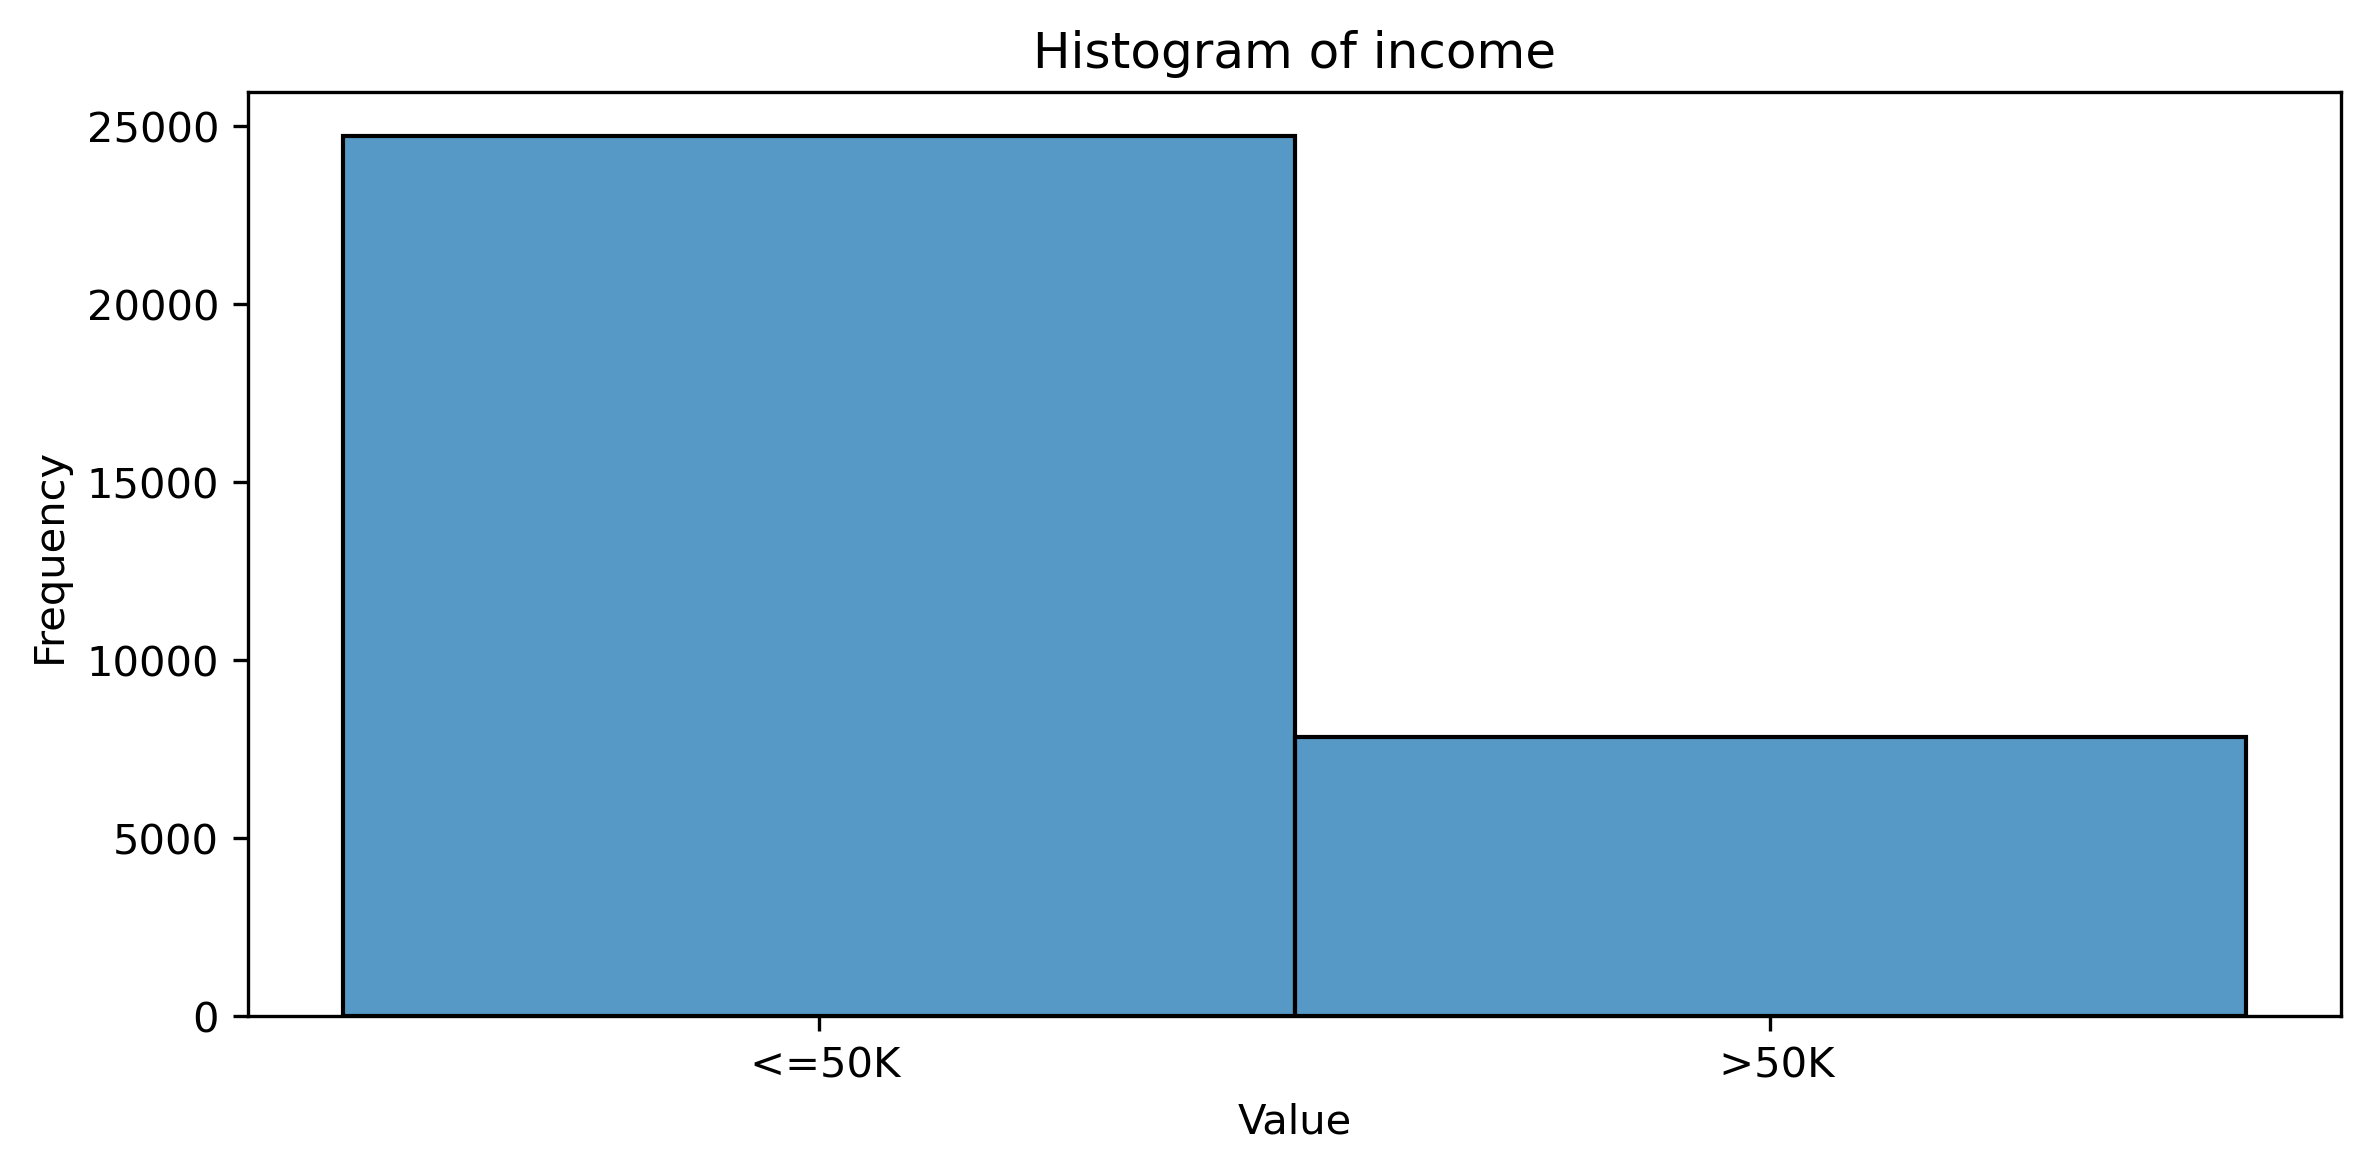

In [13]:
# Histogram of features
for column in data.columns:
    sns.histplot(data[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# Apply standardization and min - max scaling on numerical columns.
# Selecting numerical columns
data_num = data.select_dtypes(include=[int, float])
data_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country
0,39,77516,13,2174,0,40,40
1,50,83311,13,0,0,13,13
2,38,215646,9,0,0,40,40
3,53,234721,7,0,0,40,40
4,28,338409,13,0,0,40,40
...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,38
32557,40,154374,9,0,0,40,40
32558,58,151910,9,0,0,40,40
32559,22,201490,9,0,0,20,20


In [15]:
# applying standardization
sd = StandardScaler()
data_sd = sd.fit_transform(data_num)
data_sd = pd.DataFrame(data_sd, columns= data_num.columns)
data_sd

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.035429
...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,-1.655225


In [16]:
# Applying Min - Max Scaling
mm = MinMaxScaler()
data_min_max = mm.fit_transform(data_num)
data_min_max = pd.DataFrame(data_min_max, columns=data_num.columns)
data_min_max

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.397959
...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.193878


Standardization(Normalization) is prefered when there is outliers present in dataset. It is less affected by outliers as compared to Min - Max Scaling. StandardScaler transforms data to Normal Distribution with mean = 0 and Standard Deviation = 1. Most of algorithms works better with standardized data as compared to Min - Max Scaler.

Min - Max Scaling is prefered when there is no outliers are present because it is sensitive to outliers. It scales data into a fixed range usually it's ranges from  0 to 1. Use this scaling when the data is not having Normal DIstribution and we know the range of our dataset.

<Axes: >

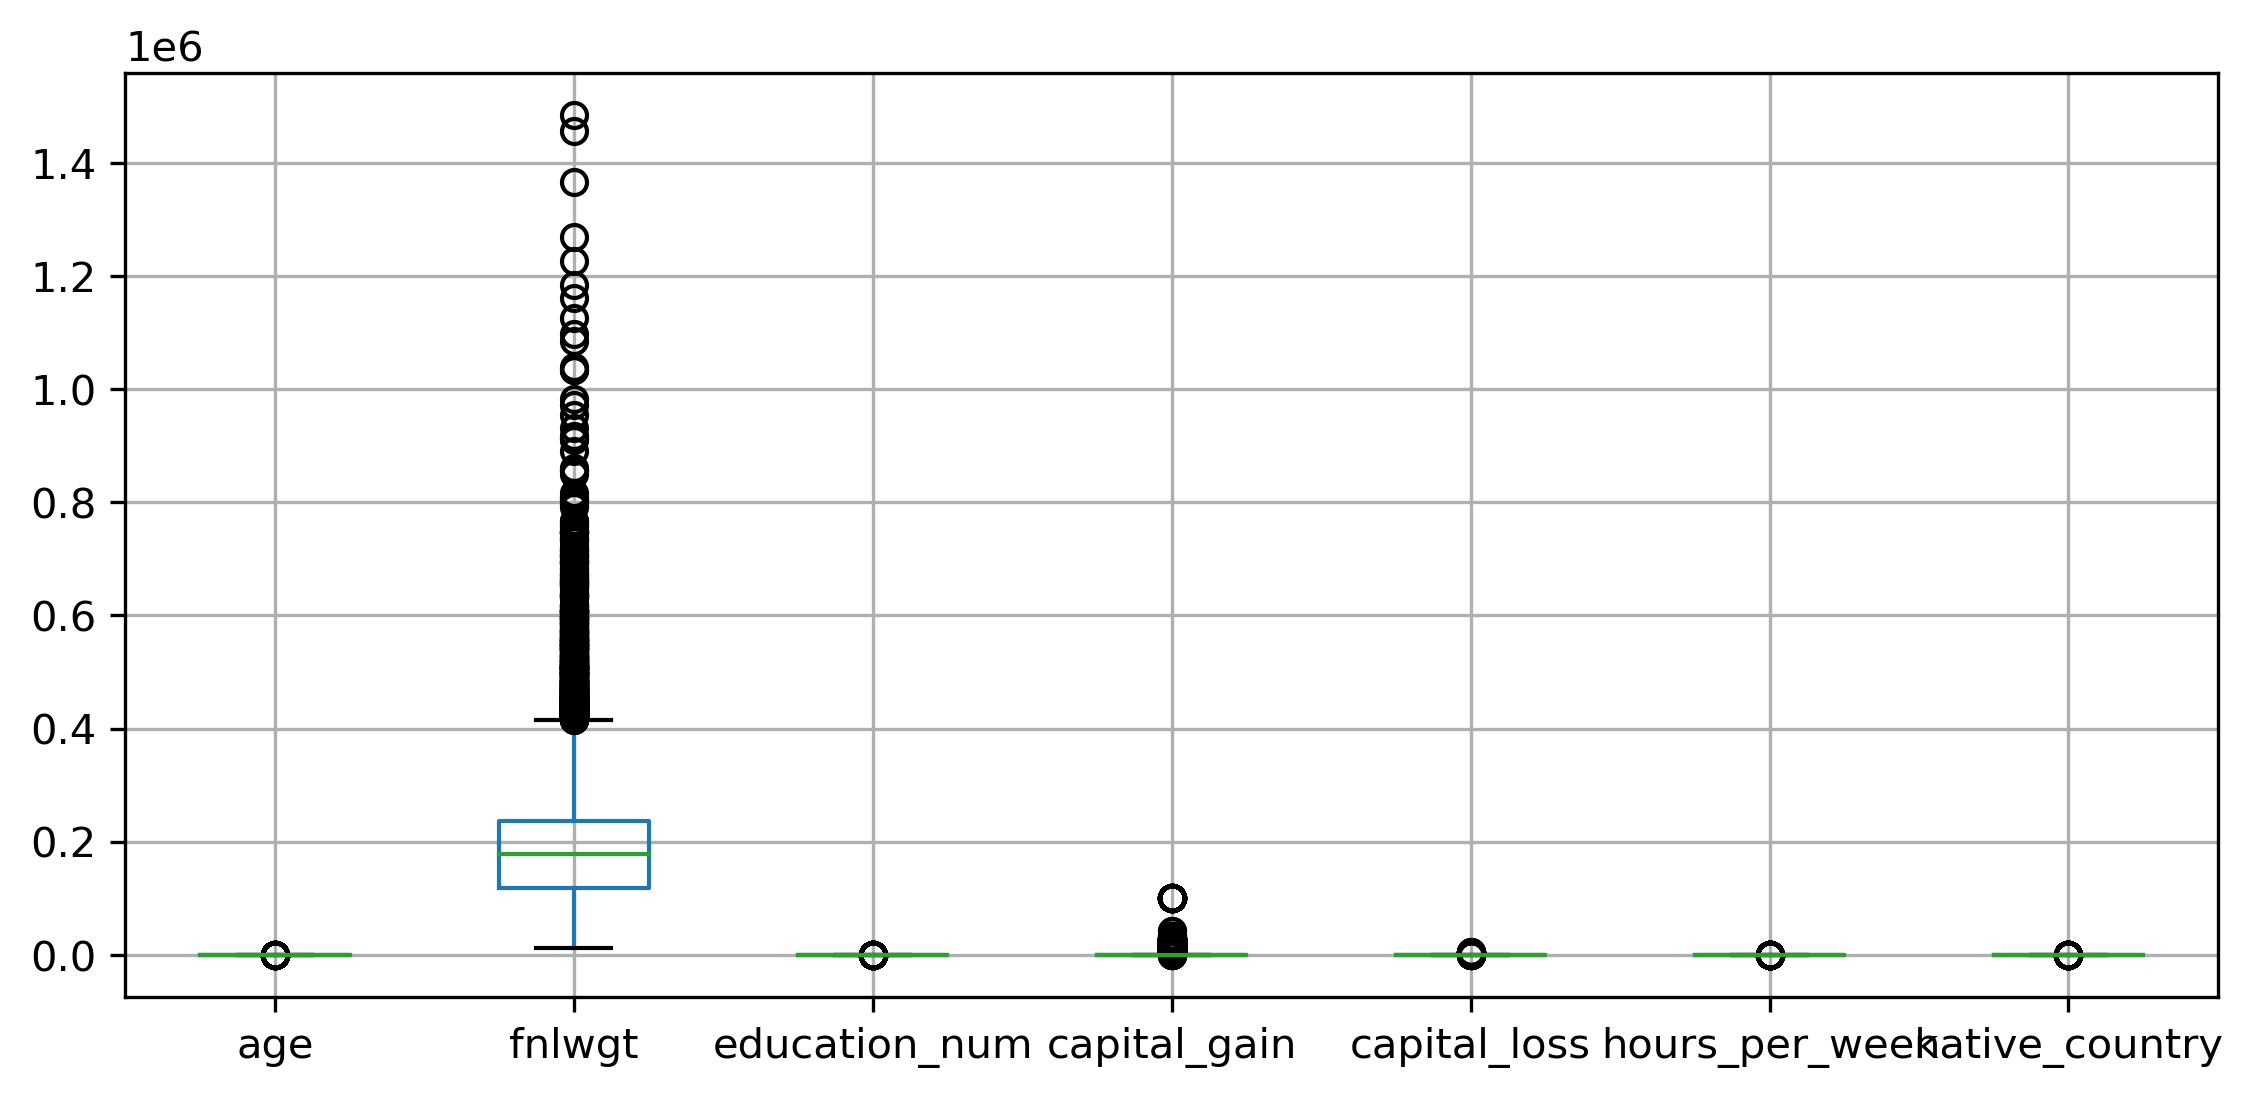

In [17]:
# Checking presence of outliers to choose any one scaling method.
data.boxplot()

In [18]:
# There is presence of outliers in almost every column.
# So choosing Standardization as final Scaling method.

In [19]:
# Encoding categorical columns into numerical.
# Selecting categorical columns from dataframe.
data_cat = data.select_dtypes(include = object)
data_cat

,workclass,education,marital_status,occupation,relationship,race,sex,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


In [20]:
less = []
for column in data_cat.columns:
    if data_cat[column].nunique()<=5:
        less.append(column)
print(less)

['race', 'sex', 'income']


In [21]:
# Applying OneHotEncoding 
ohe_data = data_cat.iloc[:, -3:]
ohe = OneHotEncoder()
ohe_values = ohe.fit_transform(ohe_data)
ohe_data = pd.DataFrame(ohe_values.toarray(), columns=ohe.get_feature_names_out(ohe_data.columns))
ohe_data

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [22]:
# Applying LabelEncoding
label_data = data_cat.iloc[:, :-3]
le = LabelEncoder()
le_data = label_data.apply(lambda col: le.fit_transform(col))
le_data

,workclass,education,marital_status,occupation,relationship
0,6,9,4,0,1
1,5,9,2,3,0
2,3,11,0,5,1
3,3,1,2,5,0
4,3,9,2,9,5
...,...,...,...,...,...
32556,3,7,2,12,5
32557,3,11,2,6,0
32558,3,11,6,0,4
32559,3,11,4,0,3


In [23]:
# merging encoded dataframes together
data_cat = pd.concat([le_data, ohe_data], axis=1)
df_transformed = pd.concat([data_sd, data_cat], axis=1) # Standardized data + encoded data
df_transformed

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,...,relationship,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.035429,6,9,4,...,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-2.222153,5,9,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.035429,3,1,2,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.035429,3,9,2,...,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,-0.197409,3,7,2,...,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,6,...,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,-1.655225,3,11,4,...,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


OneHotEncoding will create new separate columns for each unique value in exixting column and after creation of new column it will delete exixting column. This will convert categorical column into numerical. This can be applied on features but using thsi method can increase no. of features so that while model training you need to feed lots of features to model and it may lead to overfitting issue. 


LabelEncoding is used to convert categorical column into numerical, but it does not create new columns for every unique value in column. It assigns numbers for every unique valeus and transforms existing column by numbers ranging from (0 to infinity). This will not create new columns for every unique value. But this might create problem if we transform features using labelencoder method, because while training the model, higher prioroty will be given to records with higher number of values. So it may affect training of model.

### Feature Engineering

Creating 2 new features that can be benafecial for model.

1. Age-Hours per Week Interaction: Interaction between 'age' and 'hours_per_week'.
     Rationale:  It's conceivable that the combination of age and hours worked per week could have a significant impact on income. For example, older individuals with more work experience might earn higher incomes for the same number of hours worked compared to younger individuals. By creating an interaction feature, the model can capture these potential variations in income based on age and hours worked per week.
     
     
     
2. Education-Capital Interaction: Interaction between 'education_num' and 'capital_gain'.
    Rationale: Education level and capital gain might interact in complex ways to influence income. Higher levels of education might lead to higher-paying jobs, which in turn could result in higher capital gains. By creating an interaction feature between education and capital gain, the model can capture these potential synergies and their impact on income levels.

In [24]:
# 1. Age-Hours per Week Interaction
data['age_hours_interaction'] = data['age'] * data['hours_per_week']

# 2. Education-Capital Interaction
data['education_capital_interaction'] = data['education_num'] * data['capital_gain']
data.iloc[:, 16:]

,education_capital_interaction
0,28262
1,0
2,0
3,0
4,0
...,...
32556,0
32557,0
32558,0
32559,0


In [25]:
data.skew().sort_values(ascending=False)

education_capital_interaction    12.738335
capital_gain                     11.953848
capital_loss                      4.594629
fnlwgt                            1.446980
age_hours_interaction             0.799788
age                               0.558743
hours_per_week                    0.227643
native_country                    0.227643
education_num                    -0.311676
dtype: float64

Skewness > 0 = Positive Skewness

skewness < 0 = Negative Skewness

skewness = 0 = No skewness / Normally Distributed Data.

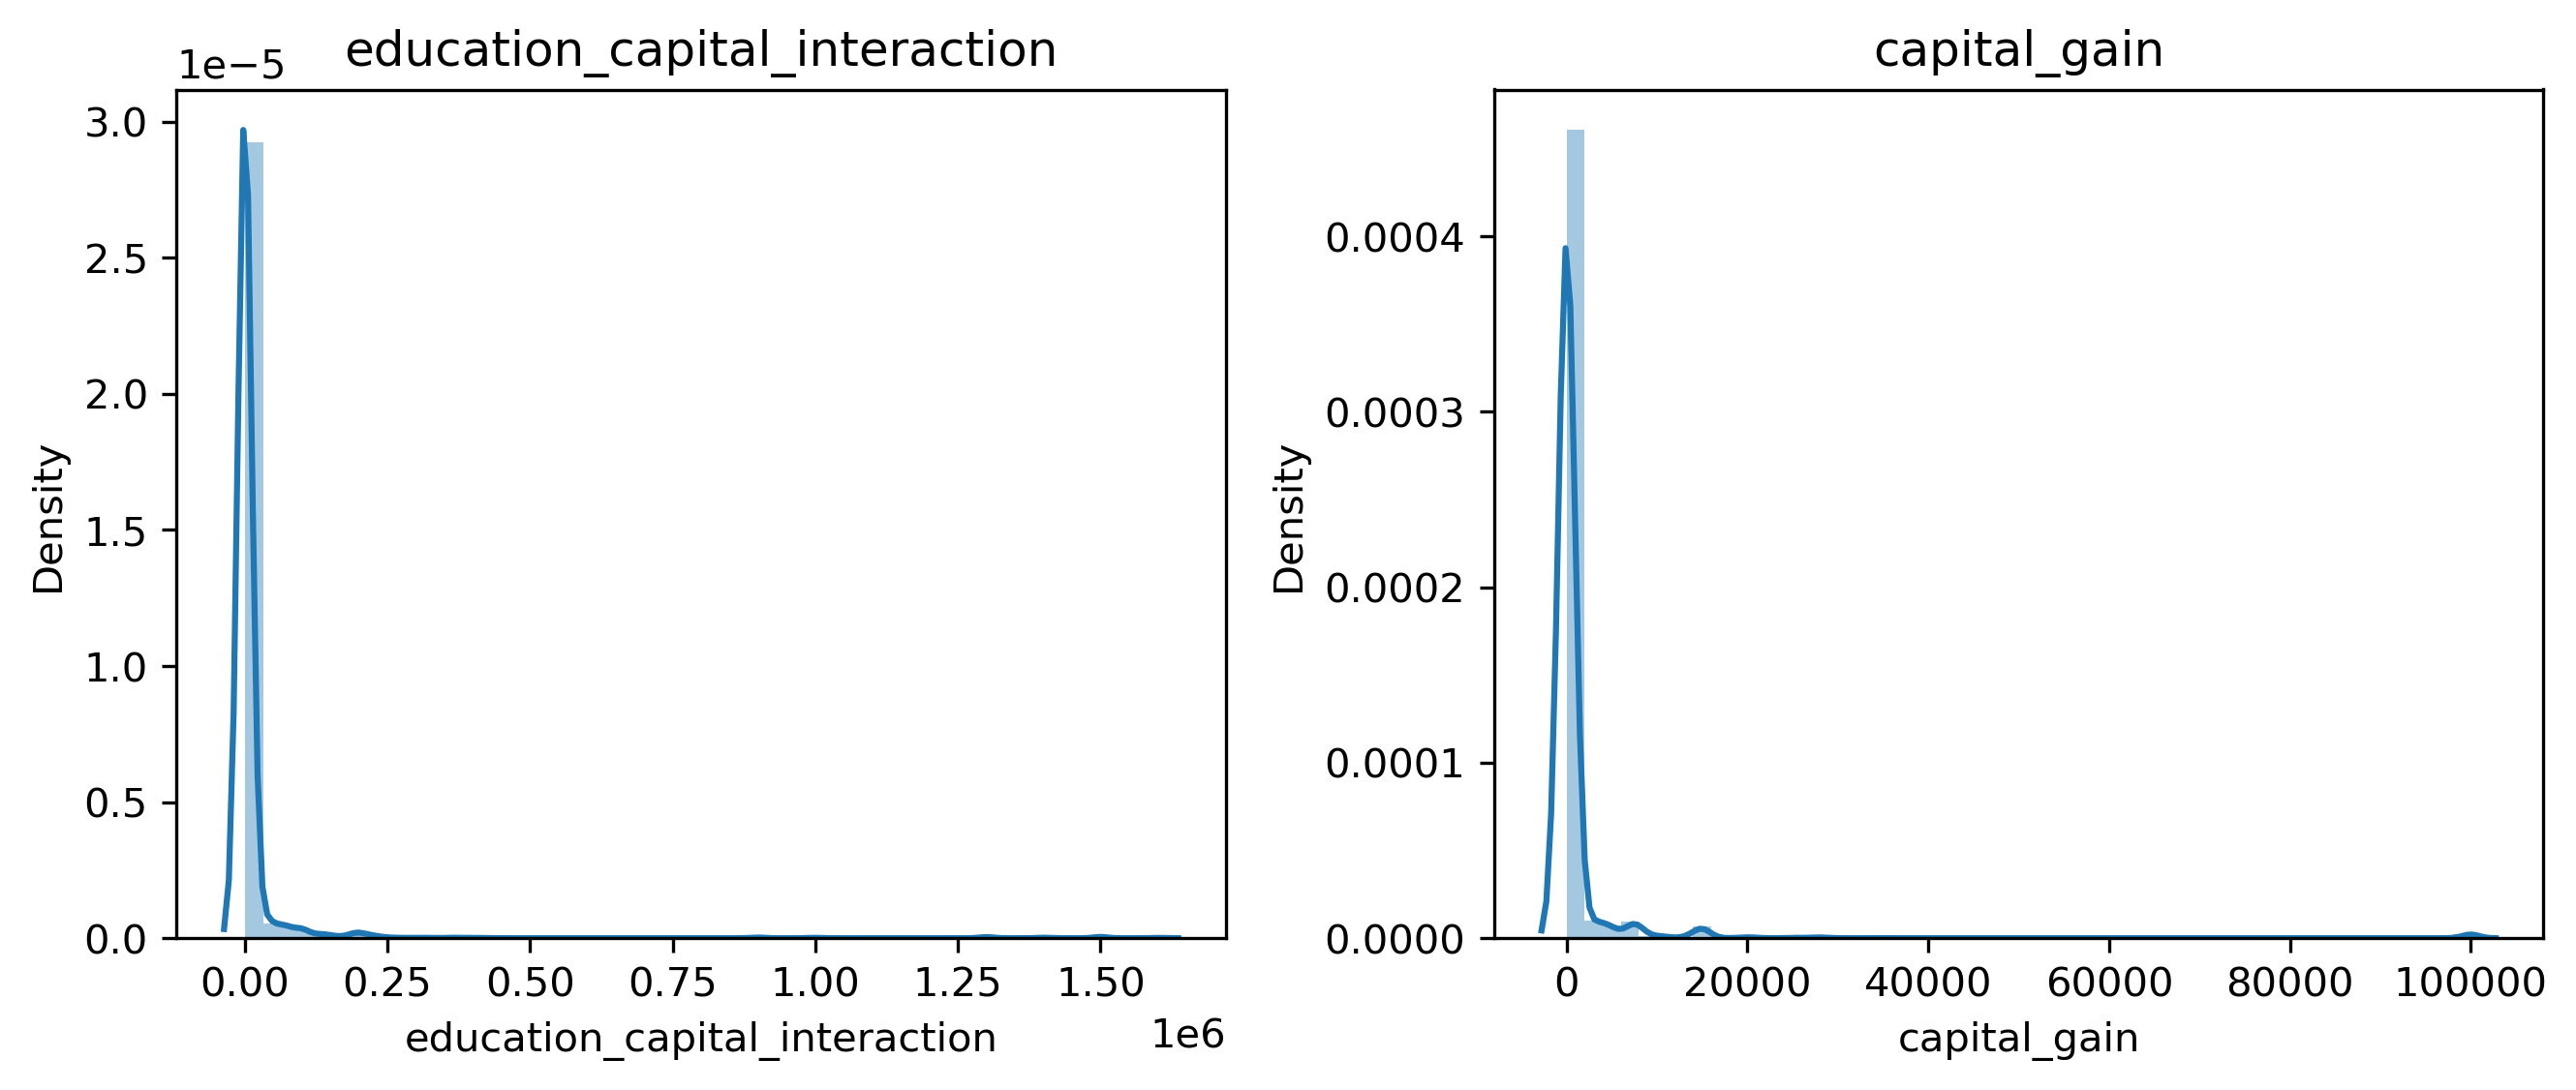

In [26]:
# Visualizing positive Skewness.
plt.subplot(1, 2, 1)
sns.distplot(data['education_capital_interaction'])
plt.title('education_capital_interaction')
plt.subplot(1, 2, 2)
sns.distplot(data['capital_gain'])
plt.title('capital_gain')
plt.tight_layout()

In [27]:
# Applying log_transformation for reducing skewness.
data['log_education_capital_interaction'] = np.log(data['education_capital_interaction'] + 1e-6)
data['log_capital_gain'] = np.log(data['capital_gain'] + 1e-6)
data.iloc[:, [15, 18]]

,age_hours_interaction,log_capital_gain
0,1560,7.684324
1,650,-13.815511
2,1520,-13.815511
3,2120,-13.815511
4,1120,-13.815511
...,...,...
32556,1026,-13.815511
32557,1600,-13.815511
32558,2320,-13.815511
32559,440,-13.815511


In [28]:
# Trying to apply sqrt transformation 
data['sqrt_education_capital_interaction'] = np.sqrt(data['education_capital_interaction'] + 1e-6)
data['sqrt_capital_gain'] = np.sqrt(data['capital_gain'] + 1e-6)
data.iloc[:, 19:]

,sqrt_education_capital_interaction,sqrt_capital_gain
0,168.113057,46.626173
1,0.001000,0.001000
2,0.001000,0.001000
3,0.001000,0.001000
4,0.001000,0.001000
...,...,...
32556,0.001000,0.001000
32557,0.001000,0.001000
32558,0.001000,0.001000
32559,0.001000,0.001000


In [29]:
data.skew().sort_values(ascending=False)

education_capital_interaction         12.738335
capital_gain                          11.953848
sqrt_education_capital_interaction     6.317476
sqrt_capital_gain                      5.894627
capital_loss                           4.594629
log_education_capital_interaction      3.028947
log_capital_gain                       3.028354
fnlwgt                                 1.446980
age_hours_interaction                  0.799788
age                                    0.558743
hours_per_week                         0.227643
native_country                         0.227643
education_num                         -0.311676
dtype: float64

Here we can see that both the transformation techniques has worked so well. But the log transformation method has reduced the skewness a lot as compared to sqrt transformation method.

In [30]:
df_transformed.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,...,relationship,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.035429,6,9,4,...,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-2.222153,5,9,2,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,0,...,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.035429,3,1,2,...,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.035429,3,9,2,...,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


### Feature Selection

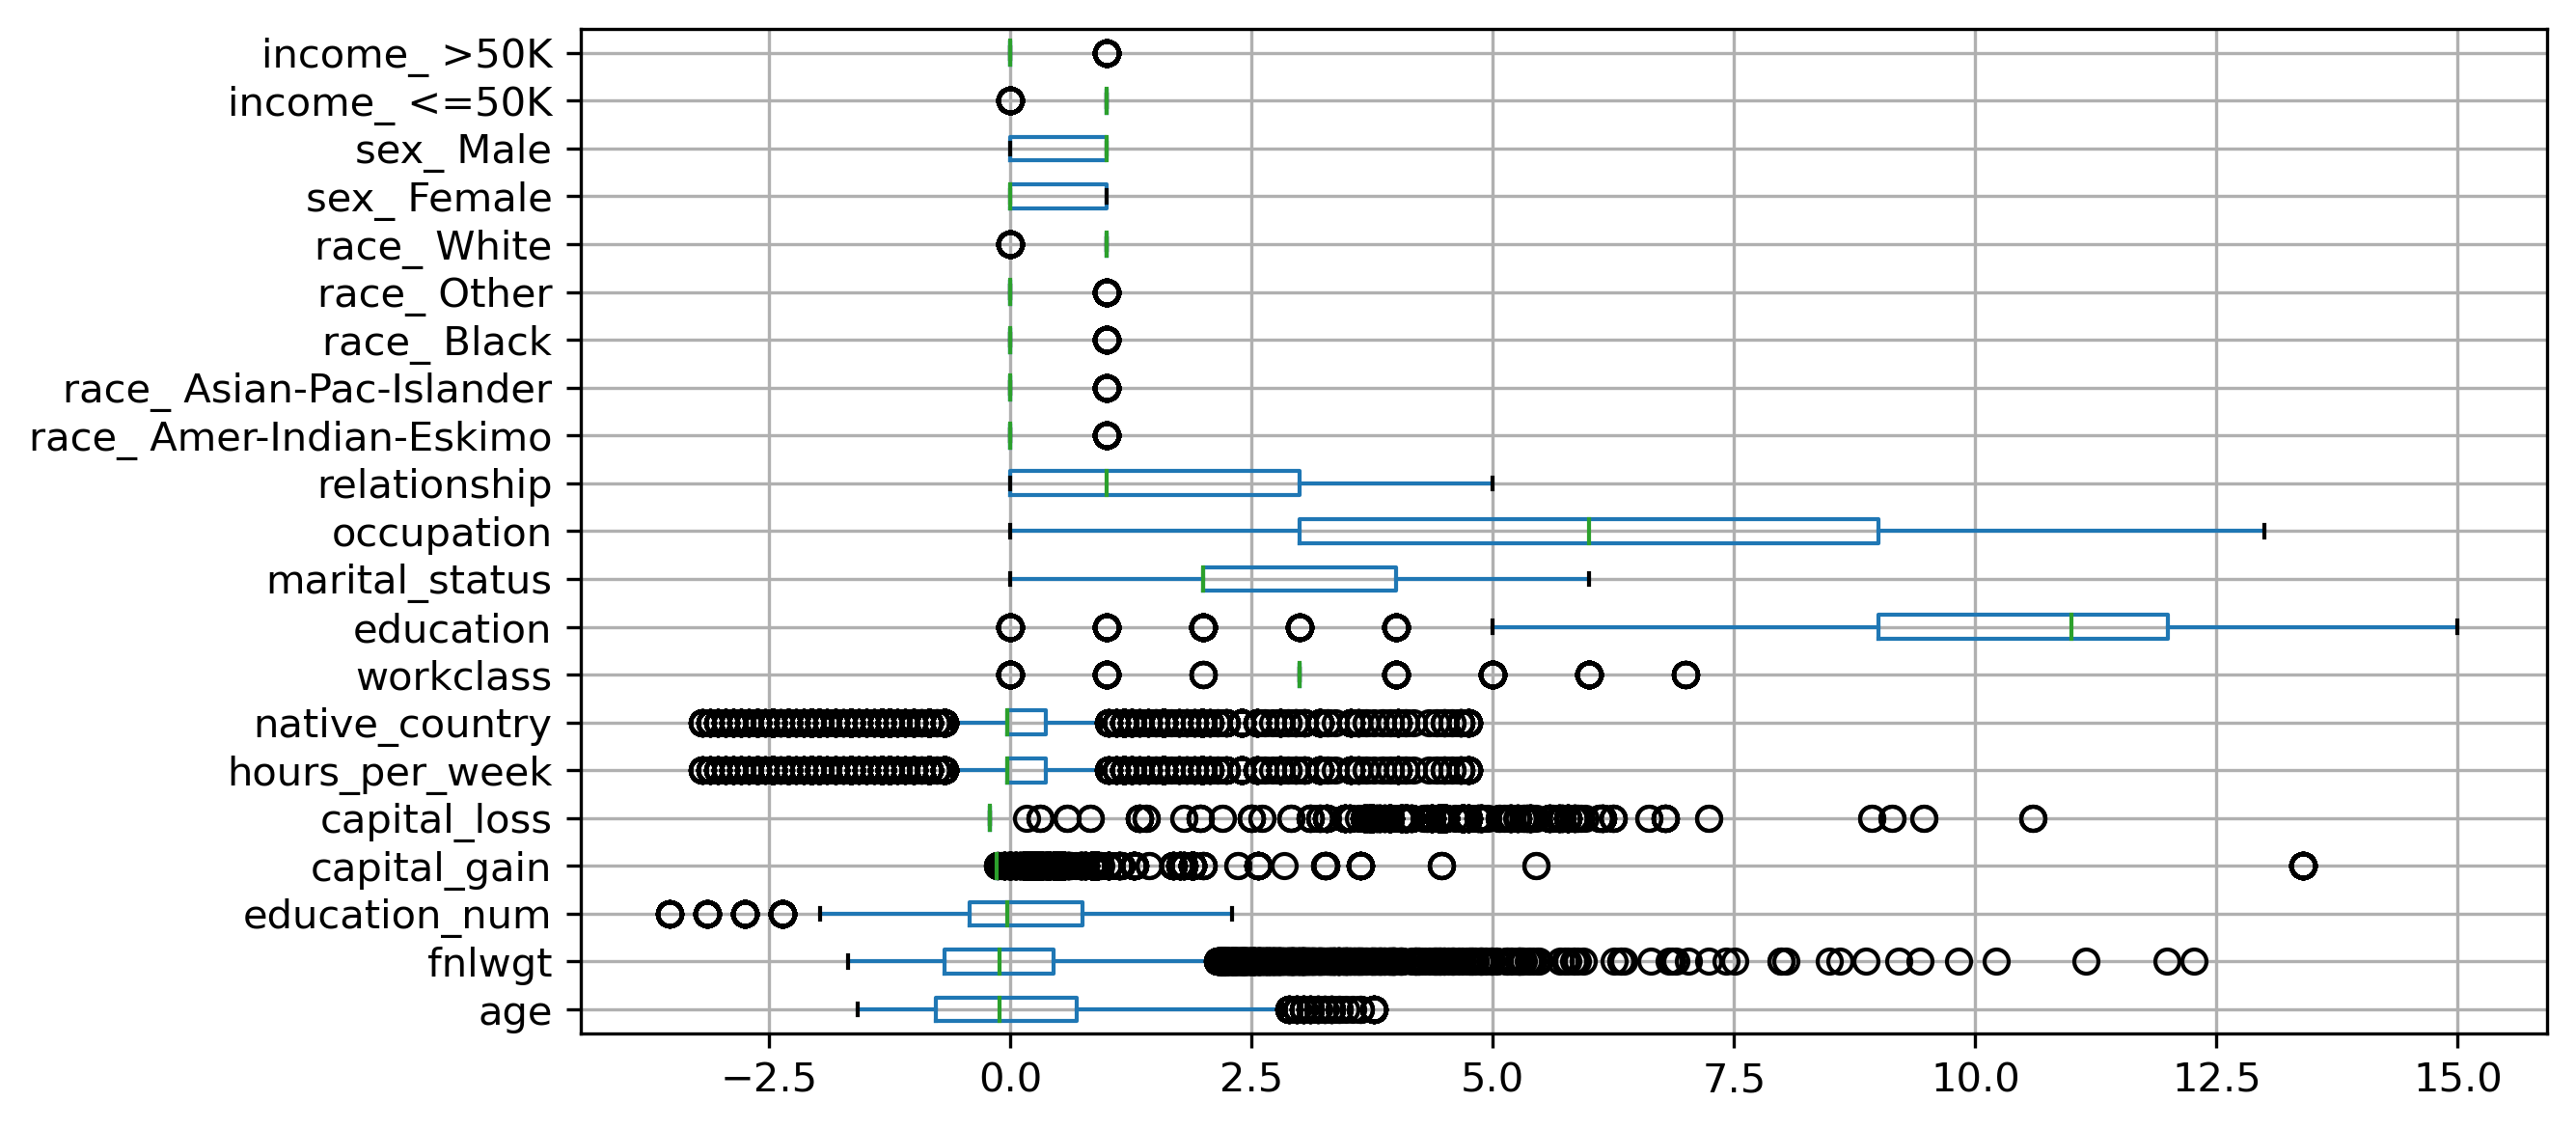

In [31]:
# Checking for outliers in data
df_transformed.boxplot(vert = False)
plt.tight_layout()

In [32]:
# Detecting outlier datapoints using IsolationForest
iso = IsolationForest()
iso.fit(df_transformed)
outliers = iso.predict(df_transformed)
outliers

array([ 1,  1,  1, ...,  1,  1, -1])

In [33]:
# Printing outlier datapoints
df_transformed['outliers'] = outliers
df_transformed[df_transformed['outliers'] == -1]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,...,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,outliers
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,-0.035429,3,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,-0.035429,3,9,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1
6,0.763796,-0.280358,-1.974858,-0.145920,-0.21666,-1.979184,-1.979184,3,6,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1
8,-0.555830,-1.364279,1.523438,1.761142,-0.21666,0.774468,0.774468,3,12,4,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-1
10,-0.115955,0.859186,-0.031360,-0.145920,-0.21666,3.204161,3.204161,3,15,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,-0.555830,0.093574,1.523438,-0.145920,-0.21666,-0.845327,-0.845327,3,12,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1
32545,0.030671,-0.741645,0.746039,-0.145920,-0.21666,-1.655225,-1.655225,1,7,2,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-1
32551,-0.482518,-1.475270,-1.586158,-0.145920,-0.21666,-0.035429,-0.035429,3,0,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1
32553,-0.482518,-0.697693,1.523438,-0.145920,-0.21666,-2.384133,-2.384133,3,12,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-1


In [34]:
# removing outliers
final_data = df_transformed[df_transformed['outliers'] == 1]
final_data = final_data.drop(columns=['income_ <=50K', 'outliers'])
final_data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,native_country,workclass,education,marital_status,occupation,relationship,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ >50K
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,-0.035429,6,9,4,0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,-2.222153,5,9,2,3,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,0,5,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,-0.115955,0.898201,1.523438,-0.145920,-0.21666,-0.035429,-0.035429,3,12,2,3,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,0.983734,0.188195,-0.420060,-0.145920,-0.21666,0.369519,0.369519,5,11,2,3,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-1.215643,1.140460,-0.031360,-0.145920,-0.21666,-0.035429,-0.035429,3,15,4,10,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,-0.197409,3,7,2,12,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,2,6,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,-0.035429,3,11,6,0,4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [35]:
# Finding relationships between features using Predictive Power Score.
feature_sel = pps.matrix(data)
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.000000,classification,True,weighted F1,0.655010,0.654813,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
436,sqrt_capital_gain,education_capital_interaction,0.849172,regression,True,mean absolute error,13733.398000,2071.382556,DecisionTreeRegressor()
437,sqrt_capital_gain,log_education_capital_interaction,0.989843,regression,True,mean absolute error,2.017638,0.020493,DecisionTreeRegressor()
438,sqrt_capital_gain,log_capital_gain,0.997716,regression,True,mean absolute error,1.825607,0.004169,DecisionTreeRegressor()
439,sqrt_capital_gain,sqrt_education_capital_interaction,0.912452,regression,True,mean absolute error,27.054833,2.368597,DecisionTreeRegressor()


In [36]:
# Considering 'income' is target column.
feature_sel[feature_sel['y'] == 'income']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
14,age,income,0.005415,classification,True,weighted F1,0.653115,0.654994,DecisionTreeClassifier()
35,workclass,income,0.094056,classification,True,weighted F1,0.653115,0.685742,DecisionTreeClassifier()
56,fnlwgt,income,0.000000,classification,True,weighted F1,0.653115,0.644900,DecisionTreeClassifier()
77,education,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
98,education_num,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
119,marital_status,income,0.000000,classification,True,weighted F1,0.653115,0.653017,DecisionTreeClassifier()
140,occupation,income,0.092410,classification,True,weighted F1,0.653115,0.685171,DecisionTreeClassifier()
161,relationship,income,0.000000,classification,True,weighted F1,0.653115,0.653115,DecisionTreeClassifier()
182,race,income,0.000000,classification,True,weighted F1,0.653115,0.653115,DecisionTreeClassifier()
203,sex,income,0.000000,classification,True,weighted F1,0.653115,0.653115,DecisionTreeClassifier()


 The ppscore of education, education_num, capital_gain, capital_loss columns is high. It means these columns are importtant as features to predict income category.
 we can use these column sto make a model. 